# EDA-Project

**Вопросы:**

    1. Сколько сериалов и фильмов?
    2. Сколько фильмов и сериалов в каждом рейтинге?
    3. Доминация жанров в зависимости от рейтинга.
    4. Из какой страны больше всего фильмов и сериалов?
    5. На какую аудиторию ориентируются производители? 
    6. Среднее время для добавления проекта в базу со дня его релиза?
    7. Какова средняя длительность фильмов и сериалов?

In [1]:
# Импорт нужных пакетов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
#pd.set_option('display.max_columns',50)

In [2]:
# Чтение данных 
or_netflix=pd.read_csv("netflix_titles.csv")
netflix=or_netflix.copy()
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
# Общая информация о данных
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
# Проверка на nan.
print(netflix.isna().sum())

# Так как nan большое количество, заменяю его на "Unknown".
netflix.fillna("Unknown", inplace=True)

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [5]:
# Чистем "listed_in"
netflix["listed_in"]=netflix["listed_in"].apply(lambda x: "Film" if x=="Movies" else ("Series" if x=="TV Shows" else x))
netflix["listed_in"]=netflix["listed_in"].apply(lambda x: x.replace("Anime Features","Anime") if "Anime Features" in x else (x.replace("Anime Series","Anime") if "Anime Series" in x else x))
netflix["listed_in"]=netflix["listed_in"].apply(lambda x: x.replace("Stand-Up Comedy & Talk Shows","Stand-Up Comedy, Talk Shows") if "Stand-Up Comedy & Talk Shows" in x else (x.replace("Classic & Cult","Classic, Cult") if "Classic & Cult" in x else x))
netflix["listed_in"]=netflix["listed_in"].apply(lambda x: x.replace("Documentaries","Documentary") if "Documentaries" in x else (x.replace("Docuseries","Documentary") if "Docuseries" in x else x))
        
# Список уникальных жанров
genres=netflix["listed_in"]
genres.replace({"Movies":"", "TV Shows":"", "TV":""}, regex=True, inplace=True)
genres=list(map(lambda value: value.split(",") if "," in value else [value], genres.values))
genres=[item for sublist in genres for item in sublist]
genres=sorted(list(set([item.strip() for item in genres])))
print(f"Total genres: {len(genres)}")
print(genres)

Total genres: 31
['Action & Adventure', 'Anime', 'British', 'Children & Family', 'Classic', 'Comedies', 'Crime', 'Cult', 'Documentary', 'Dramas', 'Faith & Spirituality', 'Film', 'Horror', 'Independent', 'International', "Kids'", 'Korean', 'LGBTQ', 'Music & Musicals', 'Mysteries', 'Reality', 'Romantic', 'Sci-Fi & Fantasy', 'Science & Nature', 'Series', 'Spanish-Language', 'Sports', 'Stand-Up Comedy', 'Talk Shows', 'Teen', 'Thrillers']


In [6]:
# Список стран
countries=netflix["country"]
countries=list(map(lambda value: value.split(",") if "," in value else [value], countries.values))
countries=[item for sublist in countries for item in sublist]
countries=sorted(list(set([item.strip() for item in countries])))
countries.remove('')
print(f"Total countries: {len(countries)}")
print(countries)


Total countries: 111
['Afghanistan', 'Albania', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Senegal', 'Serbia', 'Singapore', 'Slovakia

In [7]:
# Поделила данные на два по их типу
tv_shows=netflix[netflix["type"]=="TV Show"].reset_index(drop=True)
movies=netflix[netflix["type"]=="Movie"].reset_index(drop=True)

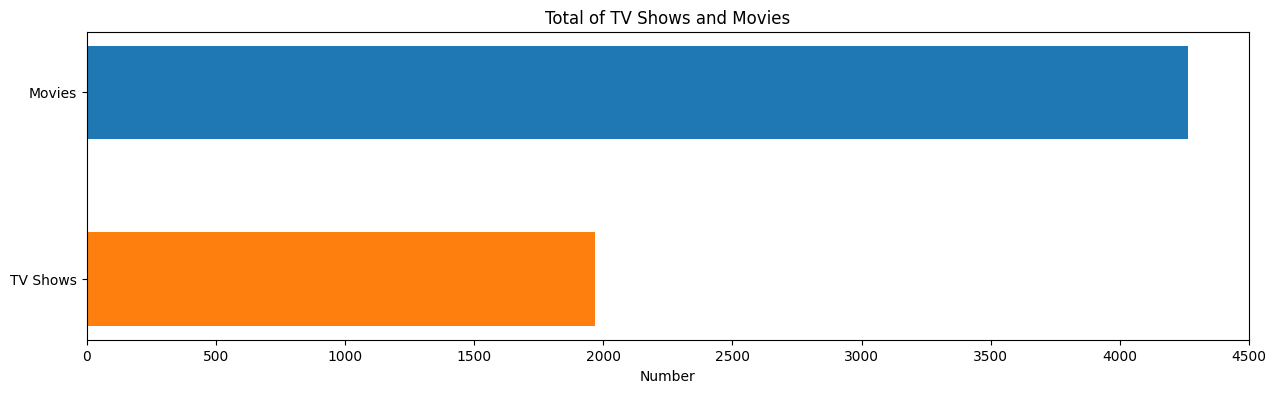

In [8]:
# Количество Сериалов и Фильмов:
plt.figure(figsize=(15,4))
plt.barh(["TV Shows", "Movies"], width=[len(tv_shows), len(movies)], height=0.5, color=["tab:orange","tab:blue"]);
plt.title("Total of TV Shows and Movies");
plt.xlabel("Number");
plt.xticks(np.arange(0,5000,500));

1. Сколько сериалов и фильмов?

    - На платформе фильмов больше чем сериалов, примерно на 2500.

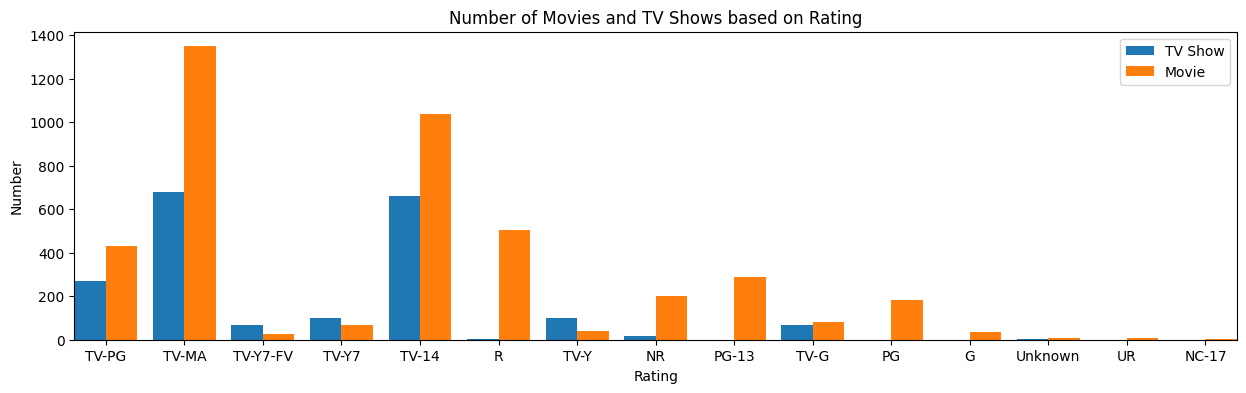

In [9]:
# Количество Сериалов и Фильмов по рейтингу
tv=[]
movie=[]
for rating in list(netflix["rating"].unique()):
    tv.append(len(tv_shows[tv_shows["rating"]==rating]))
    movie.append(len(movies[movies["rating"]==rating]))

plt.rcParams['axes.xmargin'] = 0
plt.figure(figsize=(15,4))        
X_axis = np.arange(len(netflix["rating"].unique()))
plt.bar(X_axis - 0.2, tv, 0.4, label="TV Show")
plt.bar(X_axis + 0.2, movie, 0.4, label="Movie")
            
plt.xticks(X_axis, list(netflix["rating"].unique()))
plt.xlabel("Rating")
plt.ylabel("Number")
plt.title("Number of Movies and TV Shows based on Rating")
plt.legend()
plt.show()

2. Сколько фильмов и сериалов в каждом рейтинге?

	- Больше всего проектов в рейтинге TV-MA, TV-PG и TV-14. В рейтинге R, хорошая база фильмов, но незначительное количество сериалов. Есть выбор среди фильмов в рейтинге NR, PG-13 и PG, что не скажешь о сериалах. В рейтингах TV-Y7-FV, TV-Y7 и TV-Y, сериалов чуть больше чем фильмов, хотя общее количество проектов для каждого рейтинга не меньше 100. 
	- Из данных можно предположить, что платформа больше ориентирована на взрослую аудиторию.

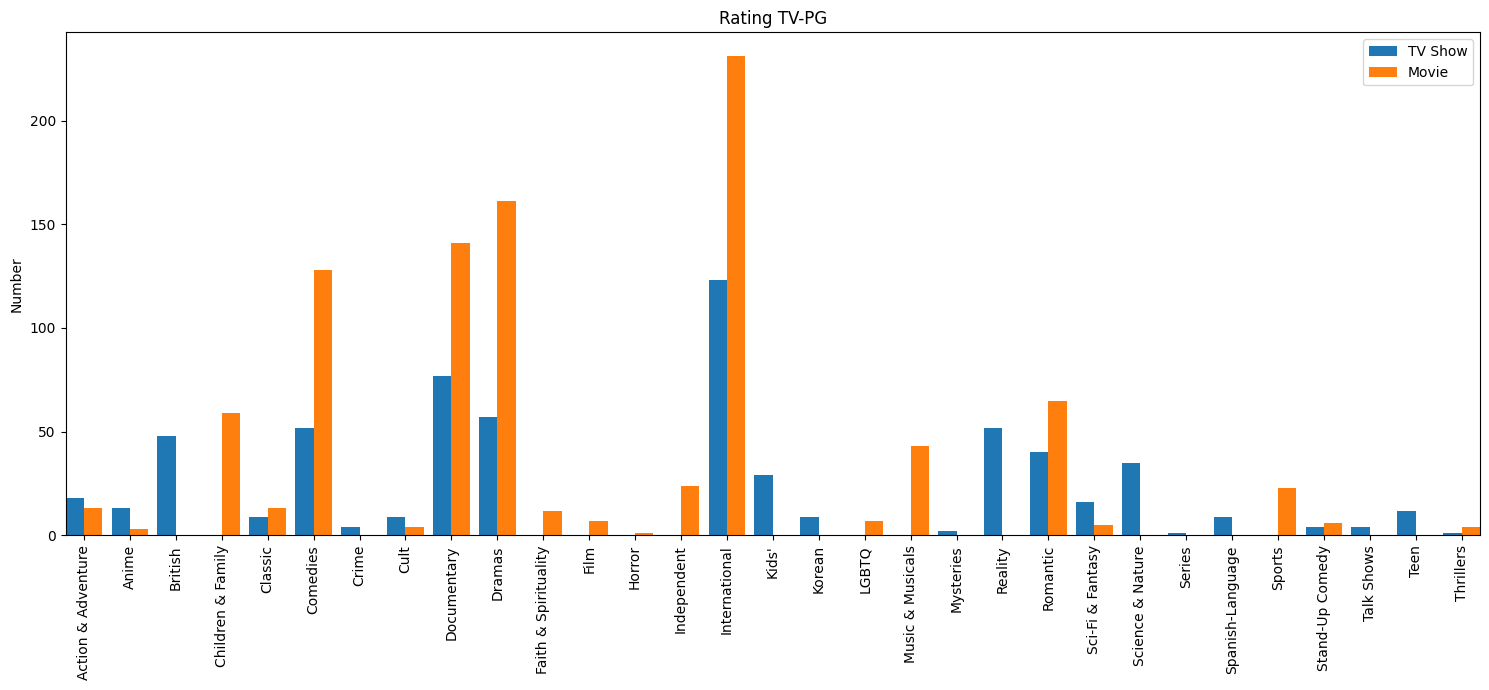

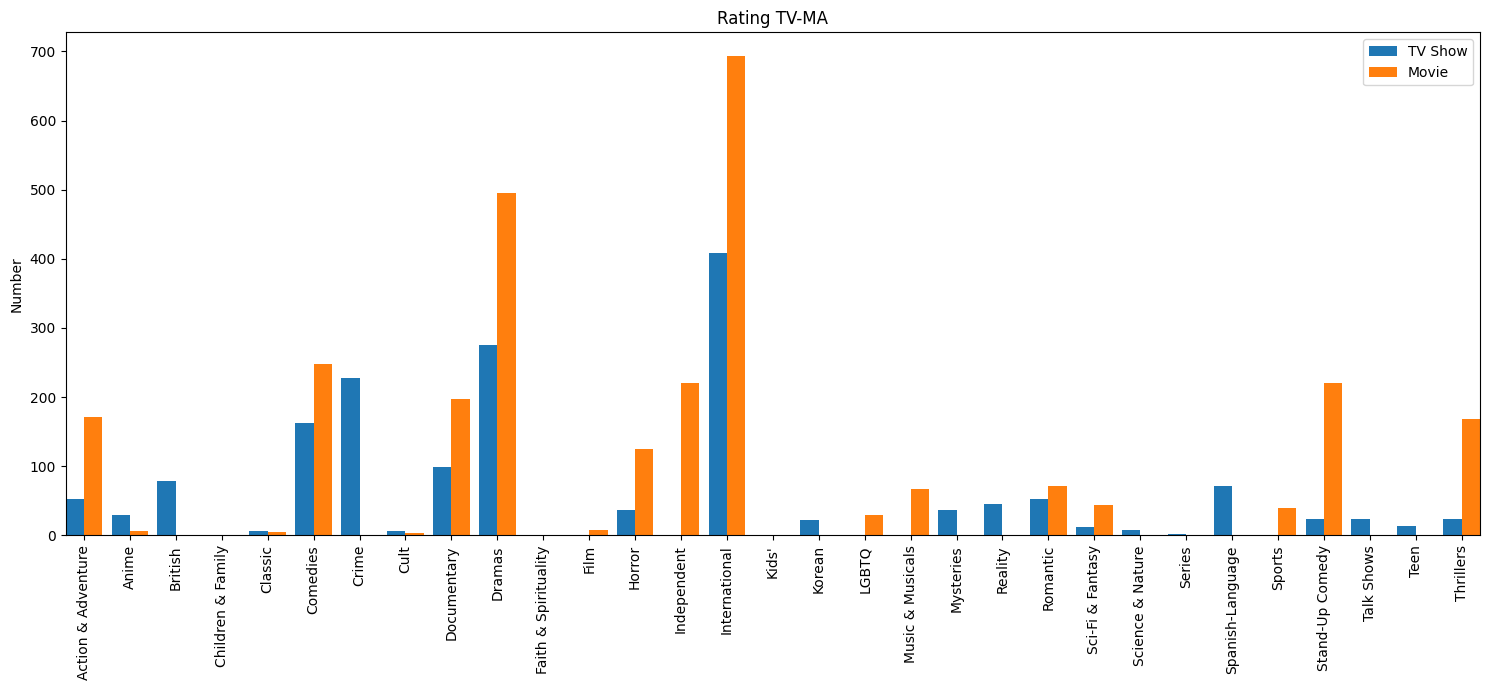

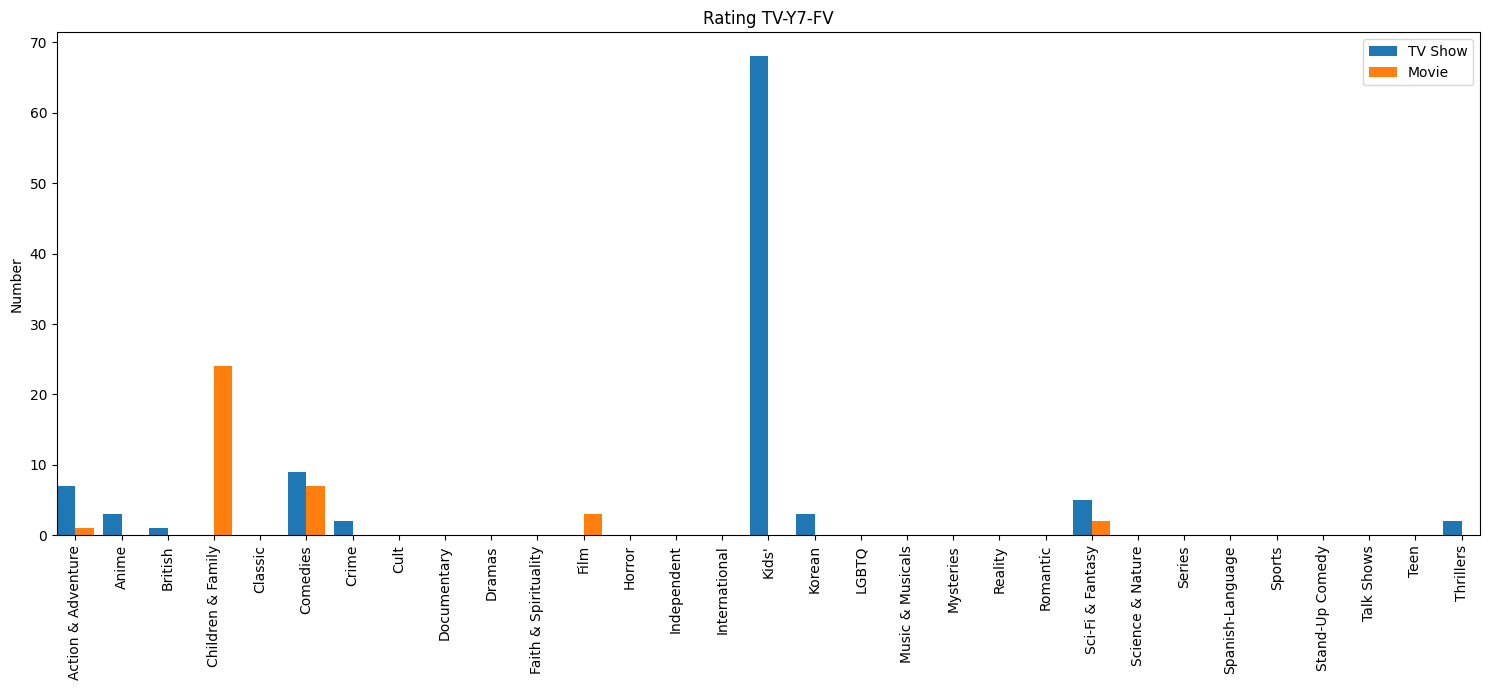

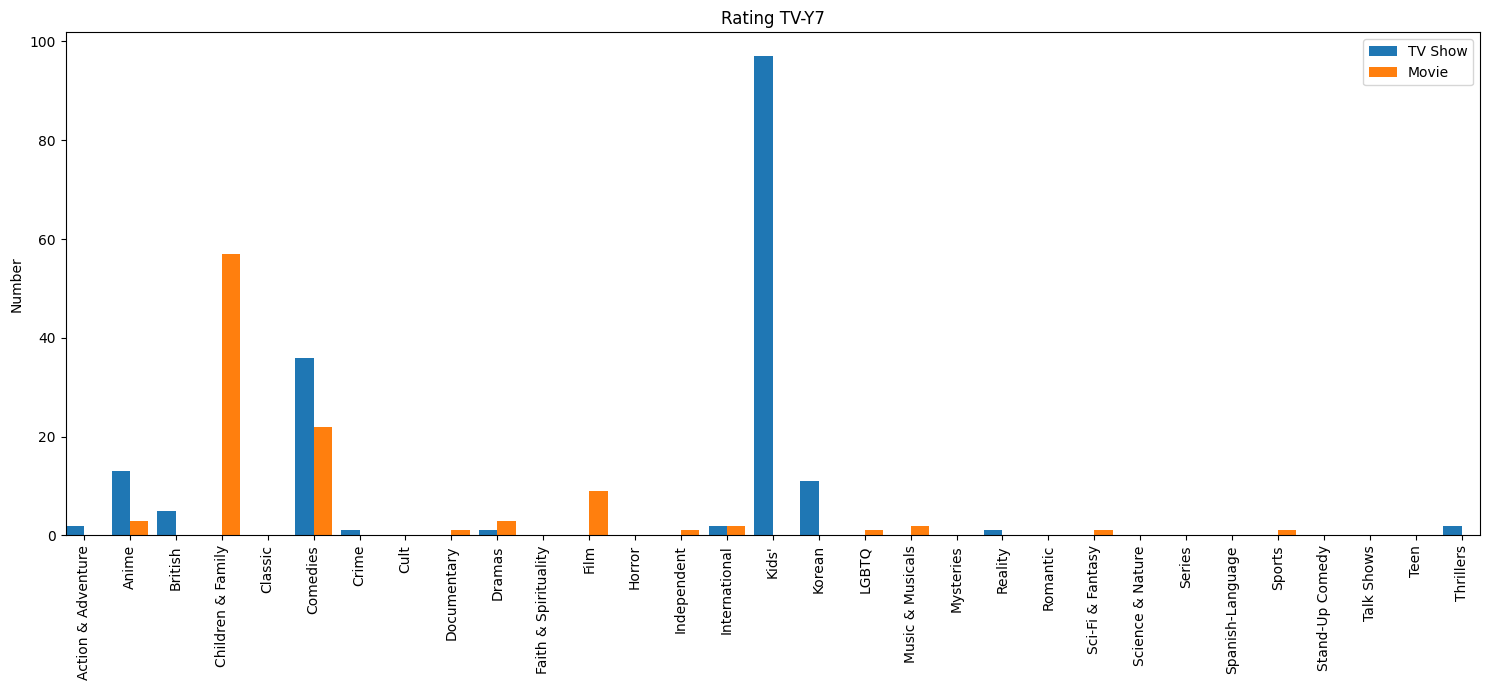

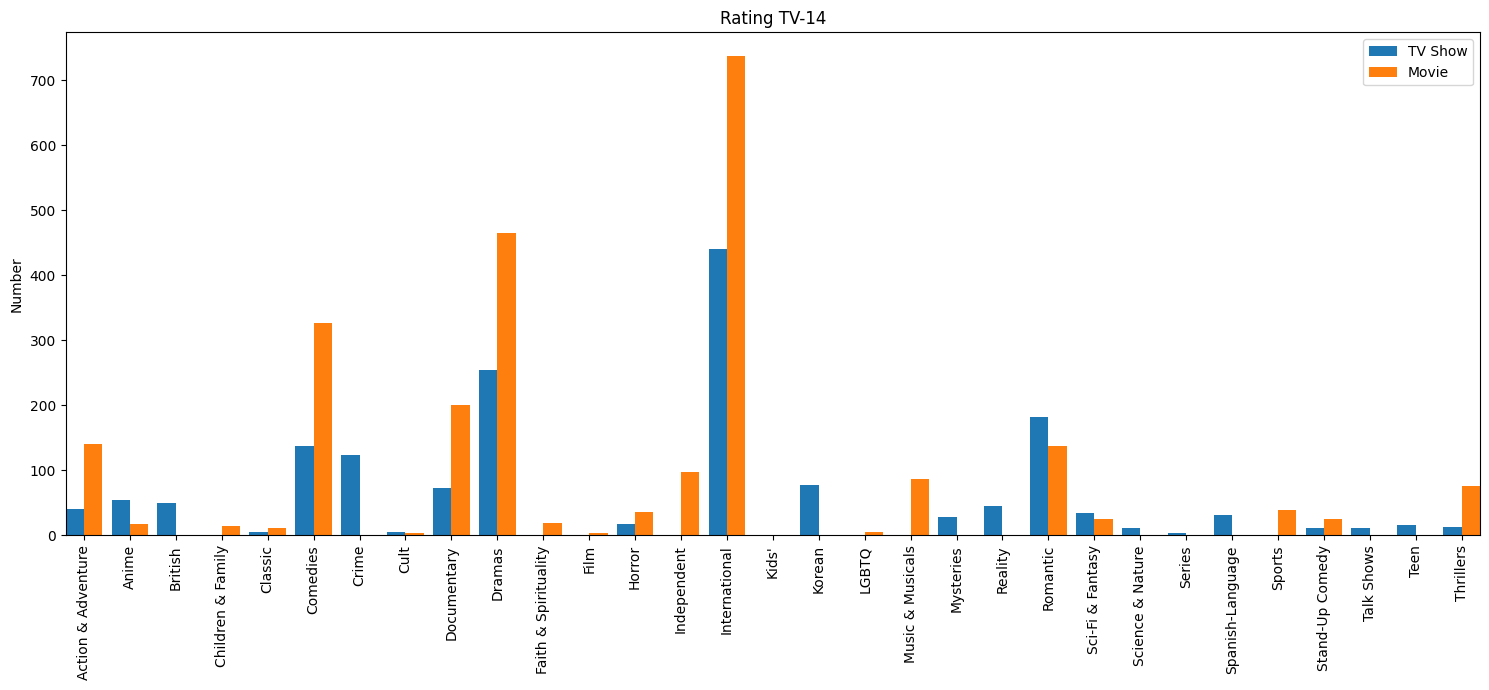

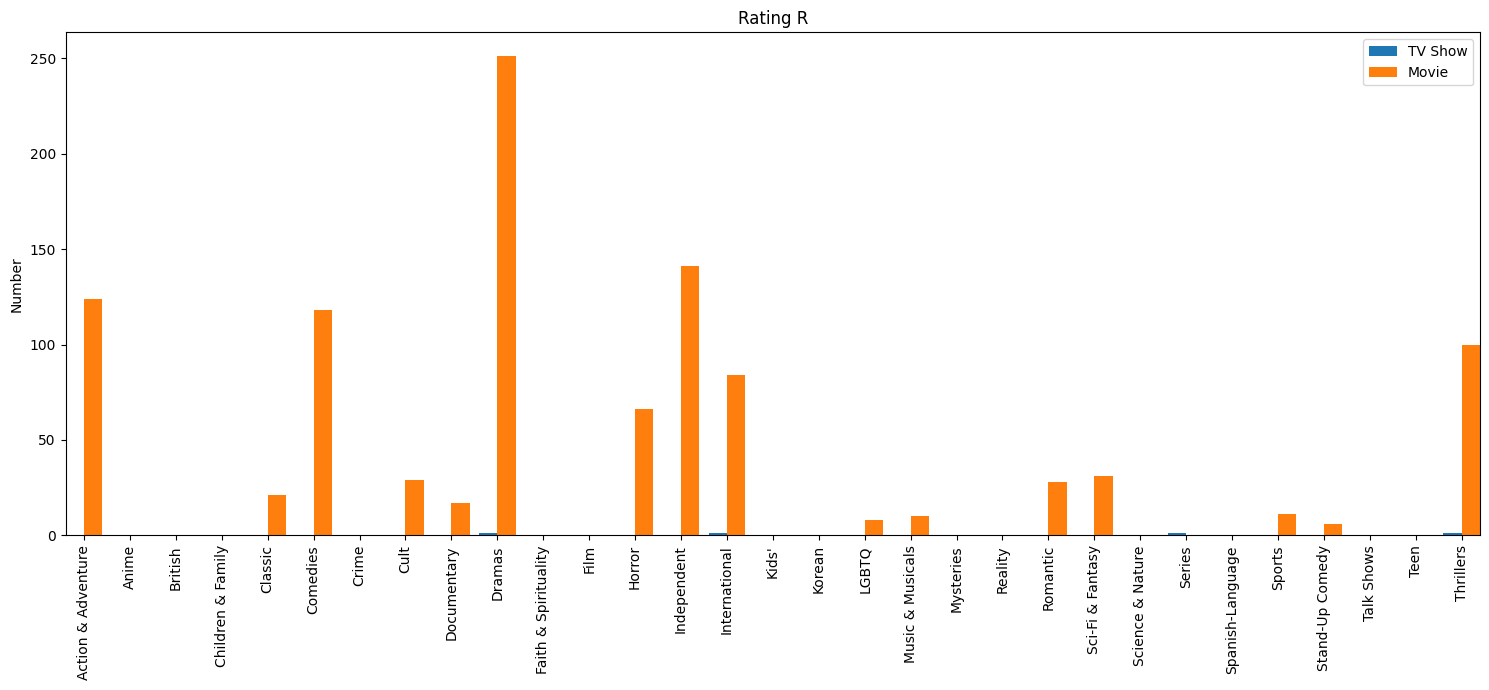

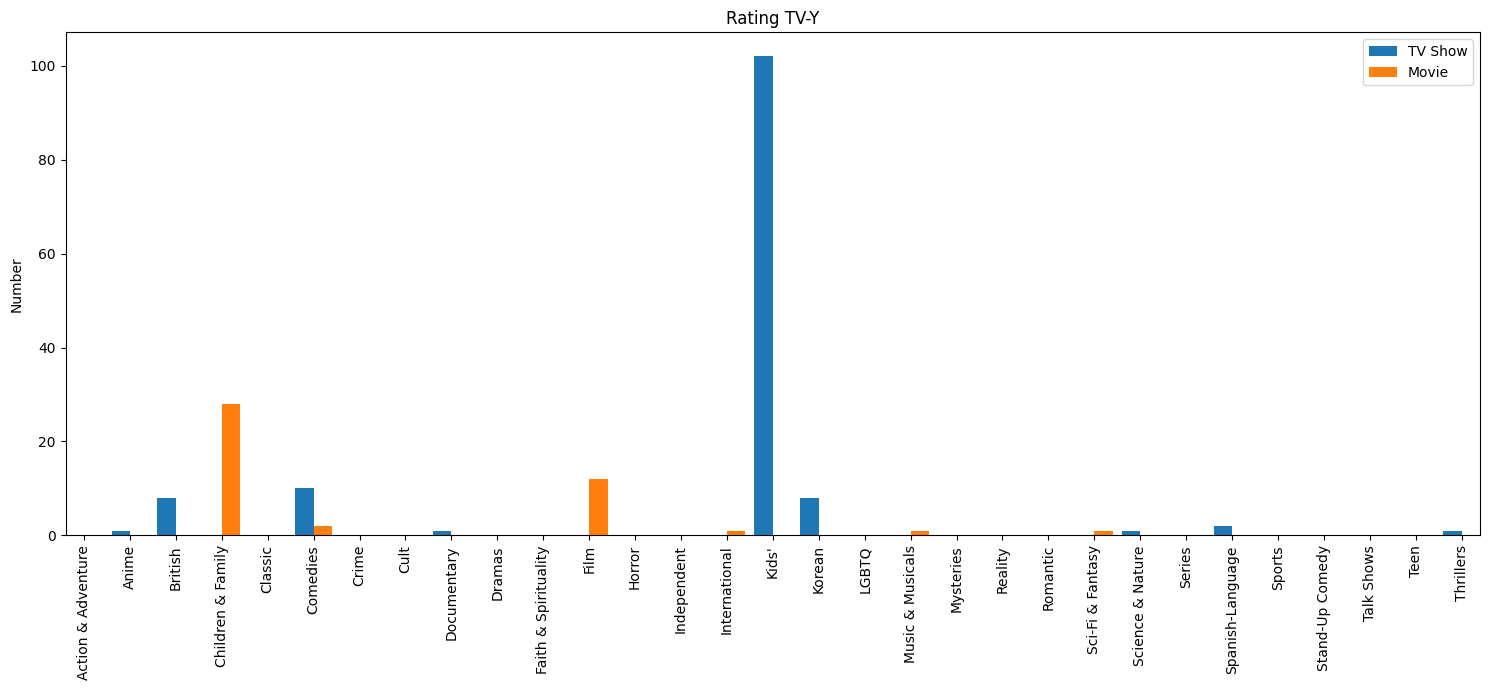

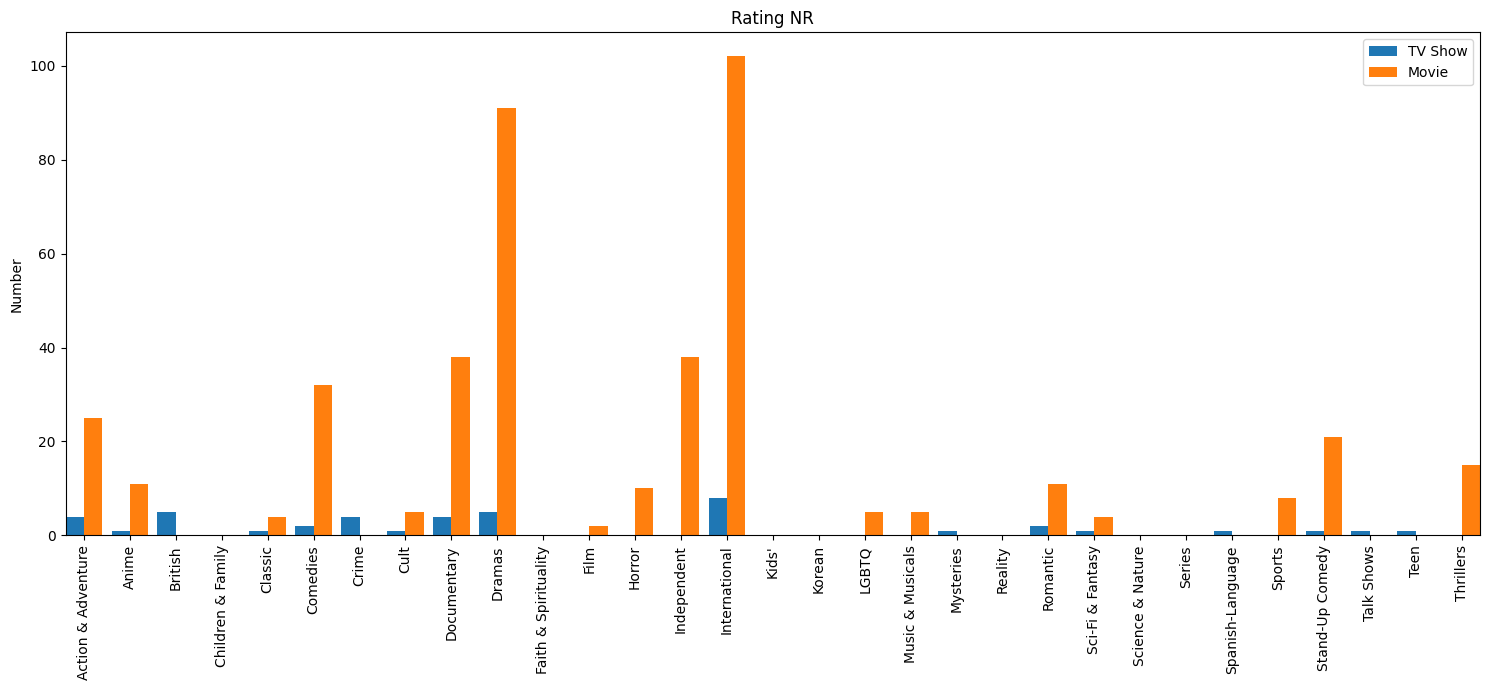

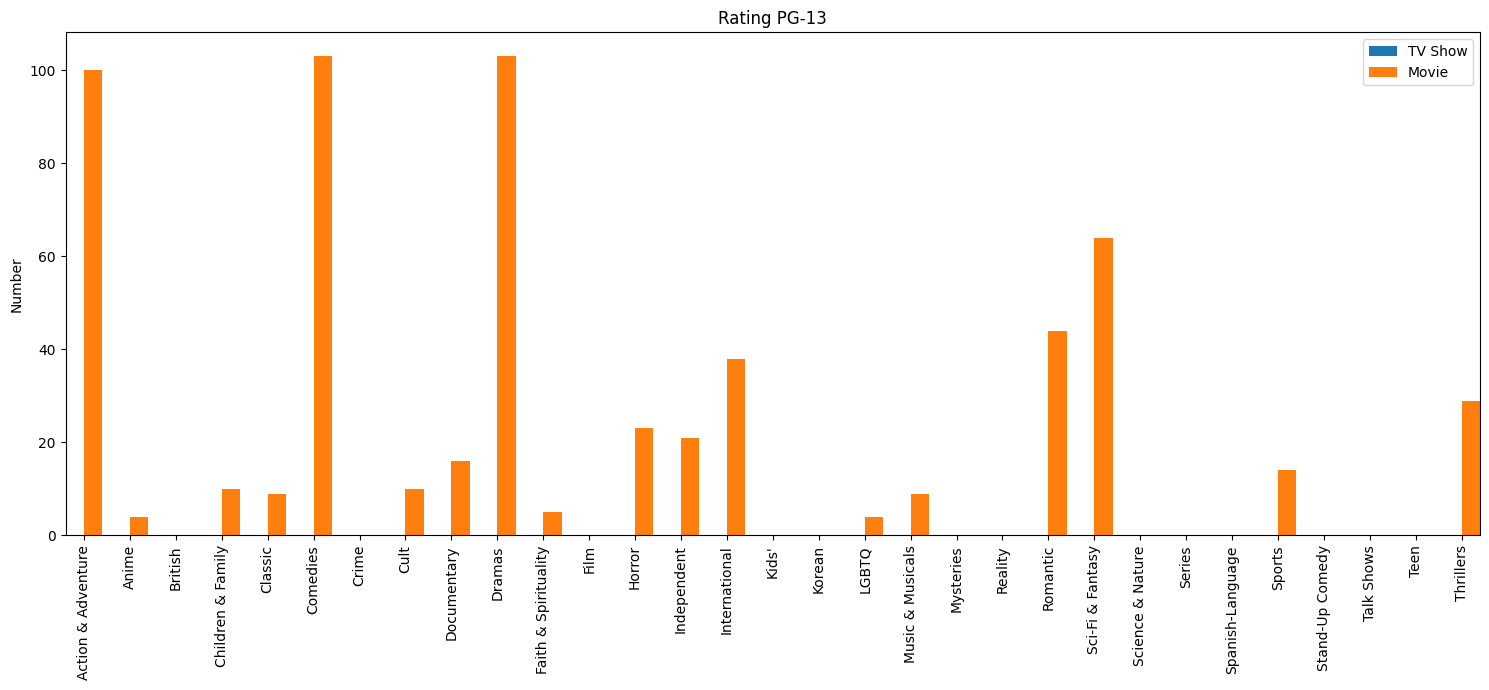

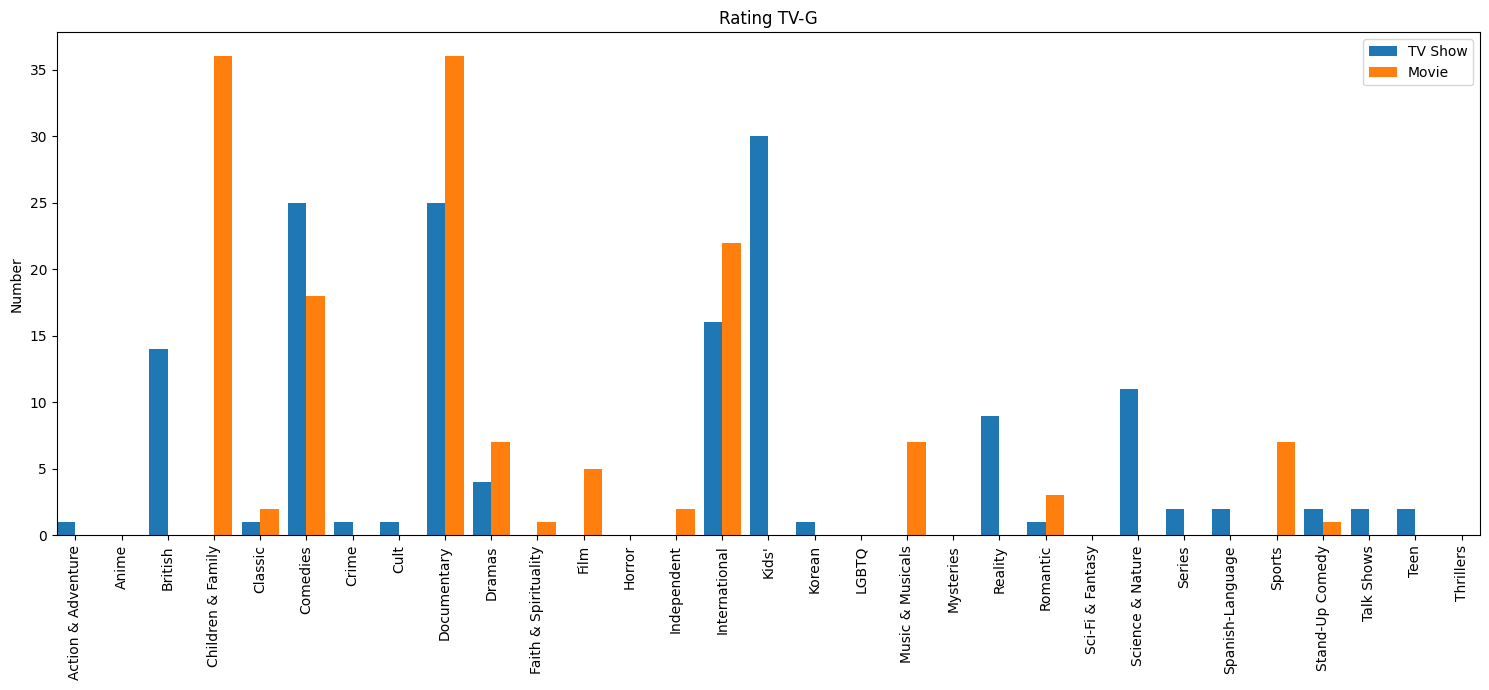

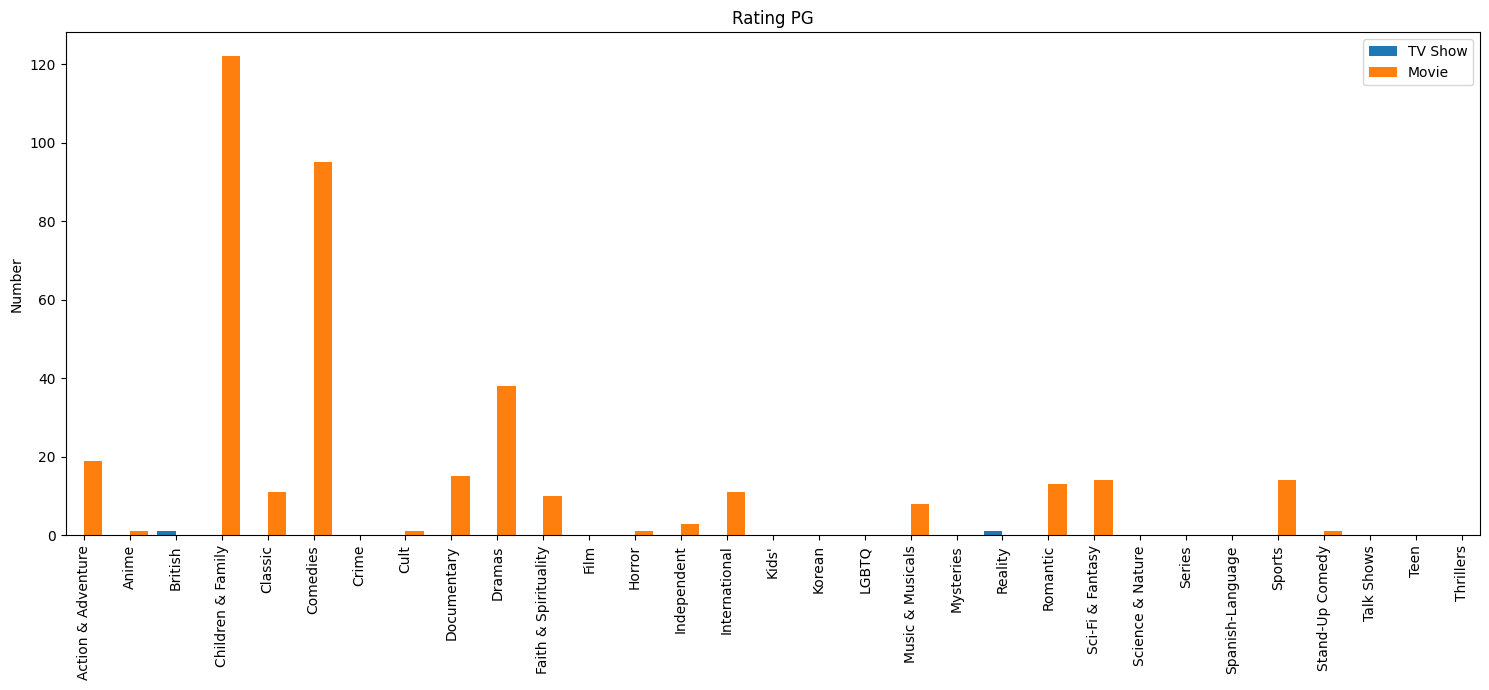

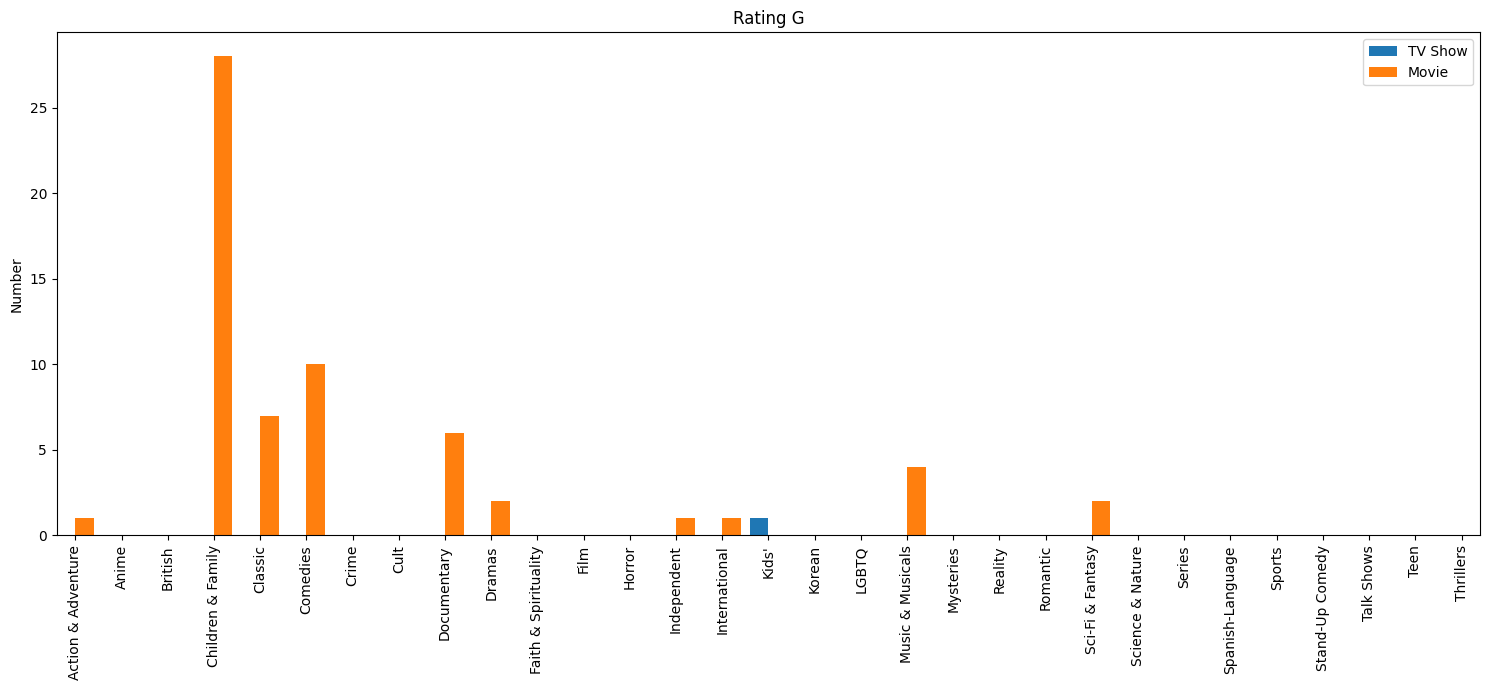

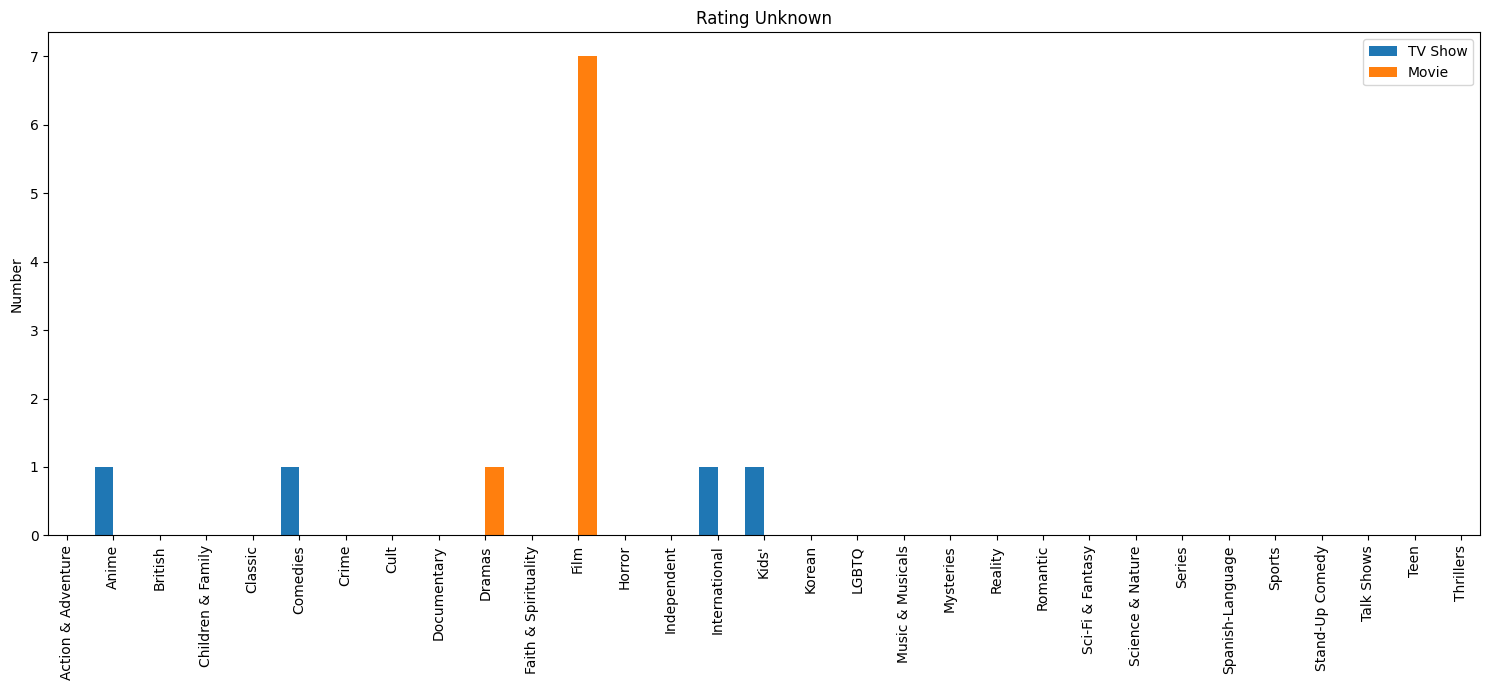

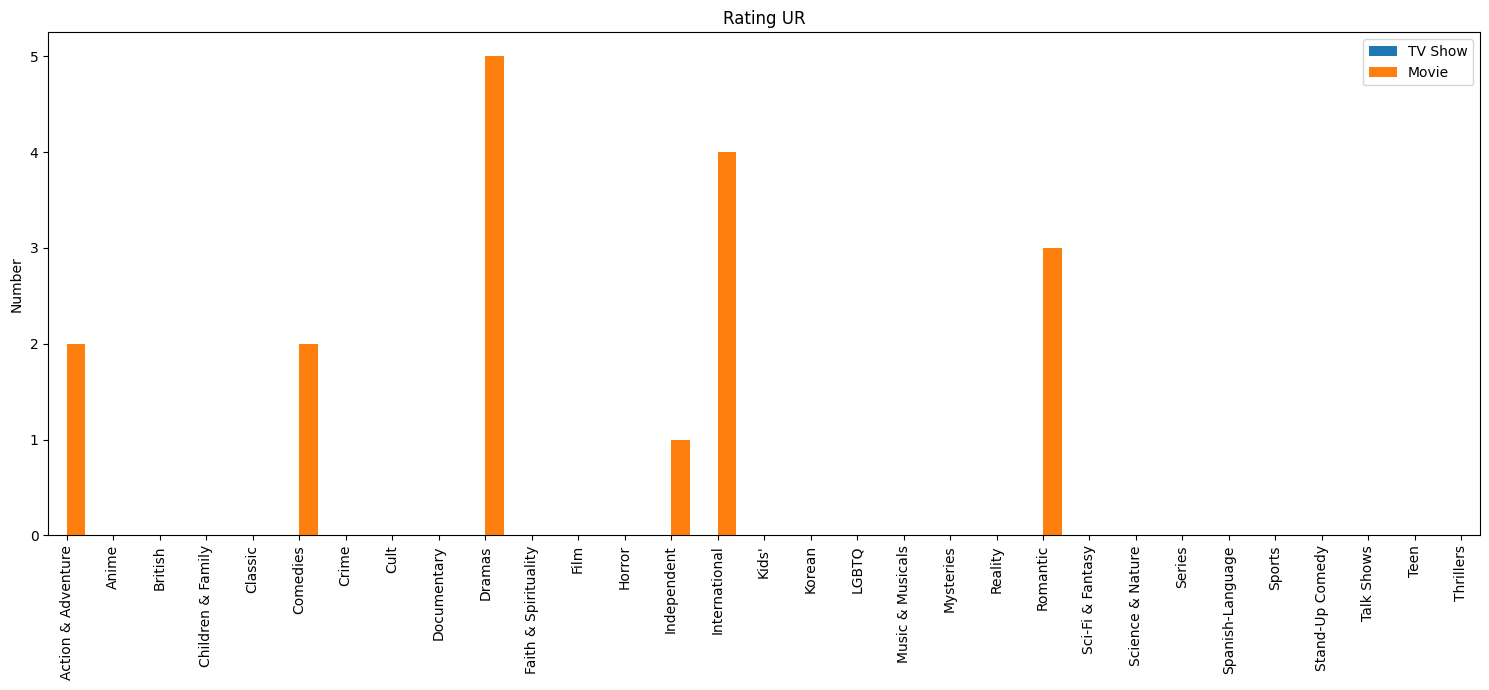

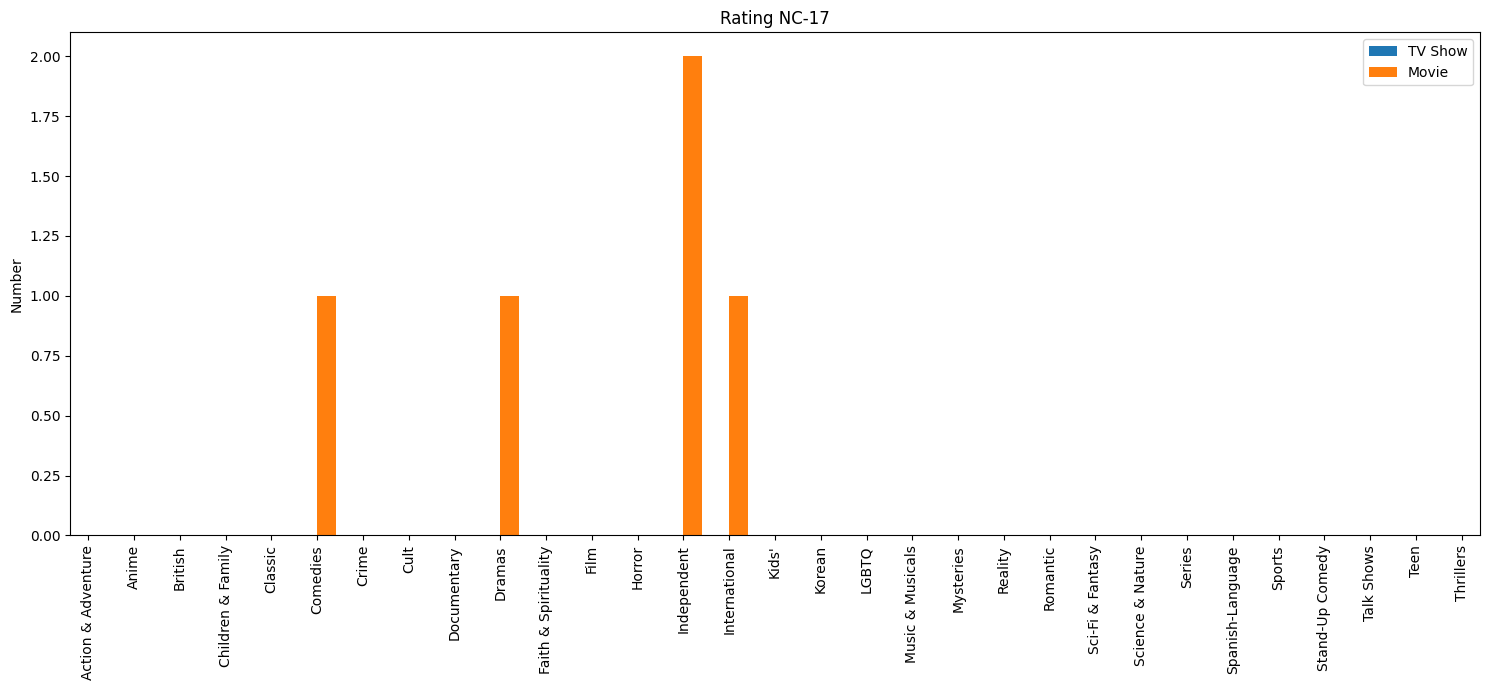

In [10]:
# Количество Сериалов и Фильмов по жанру и рейтингу
def bar(data_tv, data_m, rating, column, list):
    tv=[]
    movie=[]
    for elem in list:
        tv.append(len([value for value in data_tv[data_tv["rating"]==rating][column].values if elem in value]))
        movie.append(len([value for value in data_m[data_m["rating"]==rating][column].values if elem in value]))
    
    plt.rcParams['axes.xmargin'] = 0
    plt.figure(figsize=(15,7))        
    X_axis = np.arange(len(list))
    plt.bar(X_axis - 0.2, tv, 0.4, label="TV Show")
    plt.bar(X_axis + 0.2, movie, 0.4, label="Movie")
            
    plt.xticks(X_axis, list, rotation = 90)
    plt.ylabel("Number")
    plt.title(f"Rating {rating}")
    plt.legend()
    plt.tight_layout()
    plt.show()
        
for rating in list(netflix["rating"].unique()):
    bar(tv_shows, movies, rating, "listed_in", genres) 

3. Доминация жанров в зависимости от рейтинга.

	- В рейтингах TV-PG, TV-MA, TV-14 и TV-G есть разнообразие в жанрах среди фильмов и сериалов. Большая база в жанрах International, Dramas, Documentary и Comedies.
		- TV-PG: В жанрах International, Dramas, Documentary, Comedies и Romantic большое количество фильмов и сериалов. В категориях Children & Family, Faith & Spirituality, Independent, Music & Musicals и Sports имеются только фильмы, хоть и в маленьком количестве. В категориях British, Crime, Kids’, Korean, Reality, Science & Nature, Spanish-Language и Teen имеются только сериалы, хоть и в маленьком количестве. 
		- TV-MA: Дела обстоят почти как у TV-PG. В жанрах International, Dramas, Documentary и Comedies большой выбор сериалов и фильмов. По 200 фильмов в категориях Independent и Stand-Up Comedy. Меньше 180 фильмов в категориях Action & Adventure, Thrillers и  Horror. И меньше 50 фильмов и сериалов в других жанрах.
		- TV-14: В категориях International, Dramas, Documentary, Comedies, Romantic и Action & Adventure есть хороший выбор фильмов и сериалов, что не скажешь о других категориях.
		- TV-G: В категориях Comedies, Documentary и International есть по 15-35 фильмов и сериалов. 29 сериалов в категории Kids’, 15 сериалов в British, по 9-11 сериалов в Reality и Science & Nature. 35 фильмов в жанре Action & Adventure, по 7 фильмов в Dramas, Music & Musicals и Sports.
	- В рейтингах R, NR, PG-13, PG, G, UR и NC-17 есть большая коллекция фильмов, но не сериалов. Больше всего фильмов в категориях Action & Adventure, Comedies, Independent, Children & Family и Dramas.
		- R: 250 фильмов в Dramas. Меньше 150 фильмов в Action & Adventure, Comedies, Independent и Thrillers. Меньше 100 фильмов в Horror и International. И меньше 25 фильмов в Classic, Cult, Documentary, LGBTQ, Music & Musicals, Romantic, Sci-Fi & Fantasy, Sports и Stand-Up Comedy.
		- NR: Есть меньше 10 сериалов в некоторых категориях, все остальное фильмы. 100 фильмов в International, около 90 в Dramas. 20-40 фильмов в Documentary, Independent, Comedies, Action & Adventure, Stand-Up Comedy и Thrillers.
		- PG-13: Нет сериалов. Около 100 фильмов в жанрах Action & Adventure, Comedies и Dramas. 60 фильмов в Sci-Fi & Fantasy. Около 40 фильмов в International и Romantic.
		- PG: 120 фильмов в Action & Adventure. Около 90 фильмов в Comedies. Около 40 фильмов в  Dramas. Меньше 20 в остальных жанрах.
		- G: Примерно 23 фильмов в Children & Family. 10 фильмов в Comedies, и еще меньше в остальных.
		- UR: 5 фильмов в жанре Dramas. 4 в International. Буквально несколько штук в остальных категориях.
		- NC-17: Всего 5 фильмов в этом рейтинге. Больше всего 2 фильма в Independent.
	- В рейтингах TV-Y7-FV, TV-Y7 и TV-Y большое количество сериалов в категории Kids’, и хорошая база фильмов в категории Children & Family.
		- TV-Y7-FV: Около 68 сериалов в Kids’. Около 25 фильмов в Children & Family.
		- TV-Y7: Около 98 сериалов в Kids’. Около 58 фильмов в Children & Family. Около 48 сериалов и примерно 20 фильмов в Comedies.
		- TV-Y: 100 сериалов в Kids’. Около 25 фильмов в Children & Family.
	- Unknown: 7 фильмов в категории Film, и по 1 сериалу в Anime, Comedies, International и Kids’. 1 фильм в Dramas.

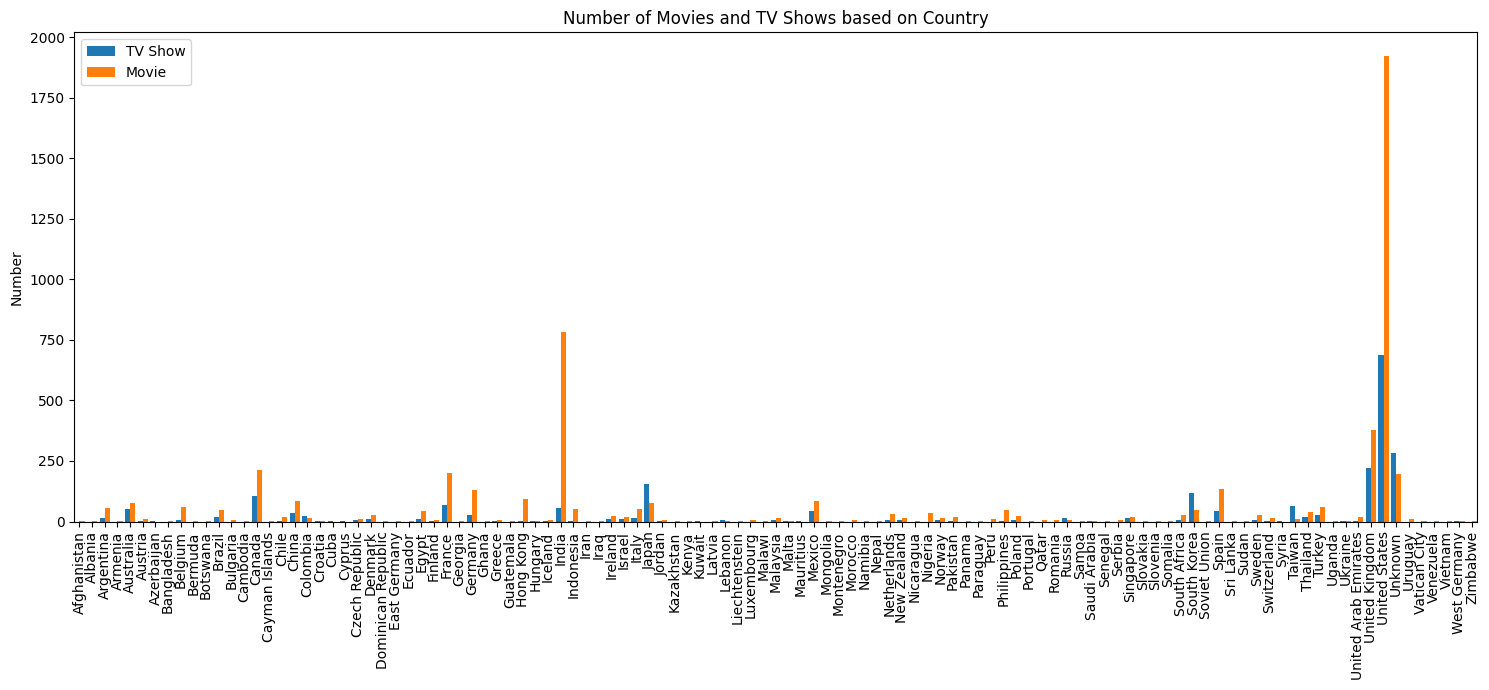

In [11]:
# Количество Сериалов и Фильмов по странам
tv=[]
movie=[]
for country in countries:
    tv.append(len([value for value in tv_shows["country"].values if country in value]))
    movie.append(len([value for value in movies["country"].values if country in value]))

plt.rcParams['axes.xmargin'] = 0
plt.figure(figsize=(15,7))        
X_axis = np.arange(len(countries))
plt.bar(X_axis - 0.2, tv, 0.4, label="TV Show")
plt.bar(X_axis + 0.2, movie, 0.4, label="Movie")
            
plt.xticks(X_axis, countries, rotation=90)
plt.ylabel("Number")
plt.title("Number of Movies and TV Shows based on Country")
plt.legend()
plt.tight_layout()
plt.show()

4. Из какой страны больше всего фильмов и сериалов?  

	- Около 2000 фильмов из US, около 750 фильмов из India, около 400 из UK, около 100 фильмов из Canada, France и Unknown. Около 750 сериалов из US, около 250 сериалов Unknown, где-то 200 сериалов из UK, и около 100 из Japan, Canada и South Korea. 

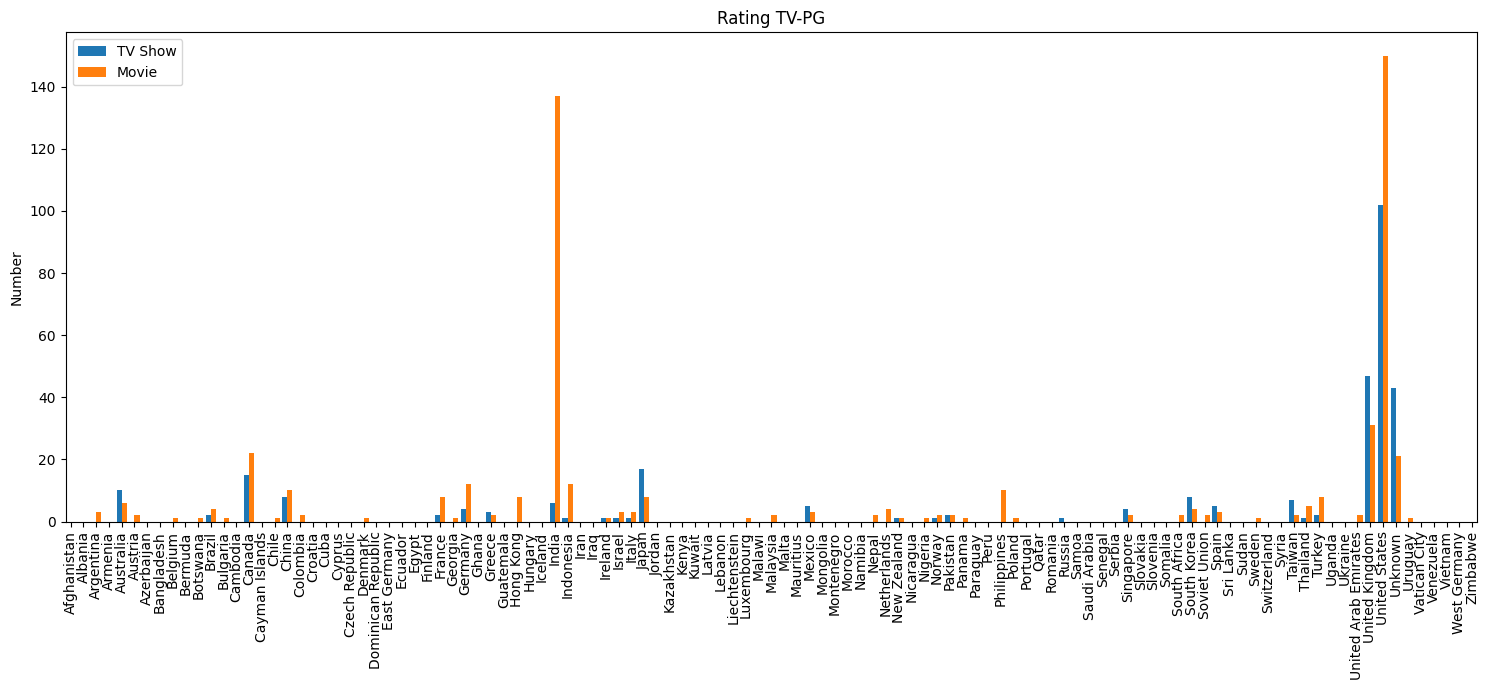

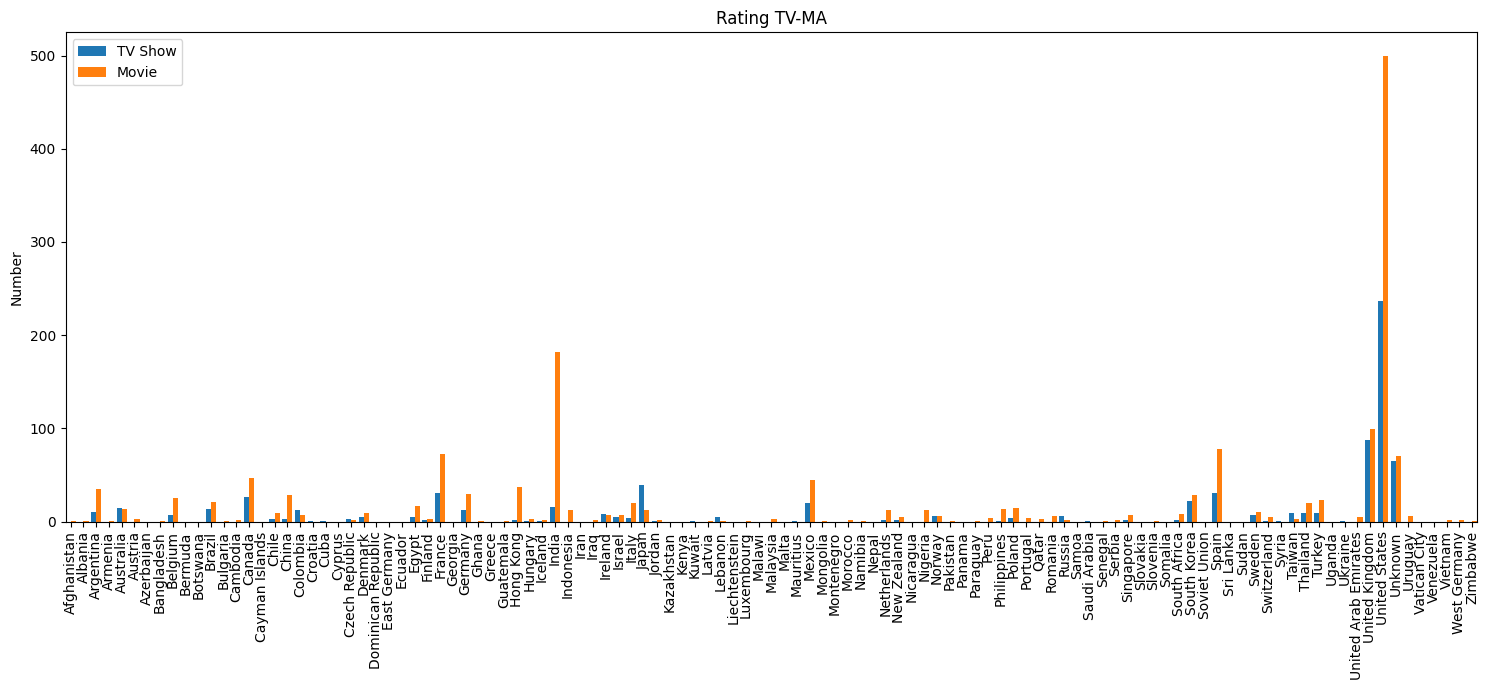

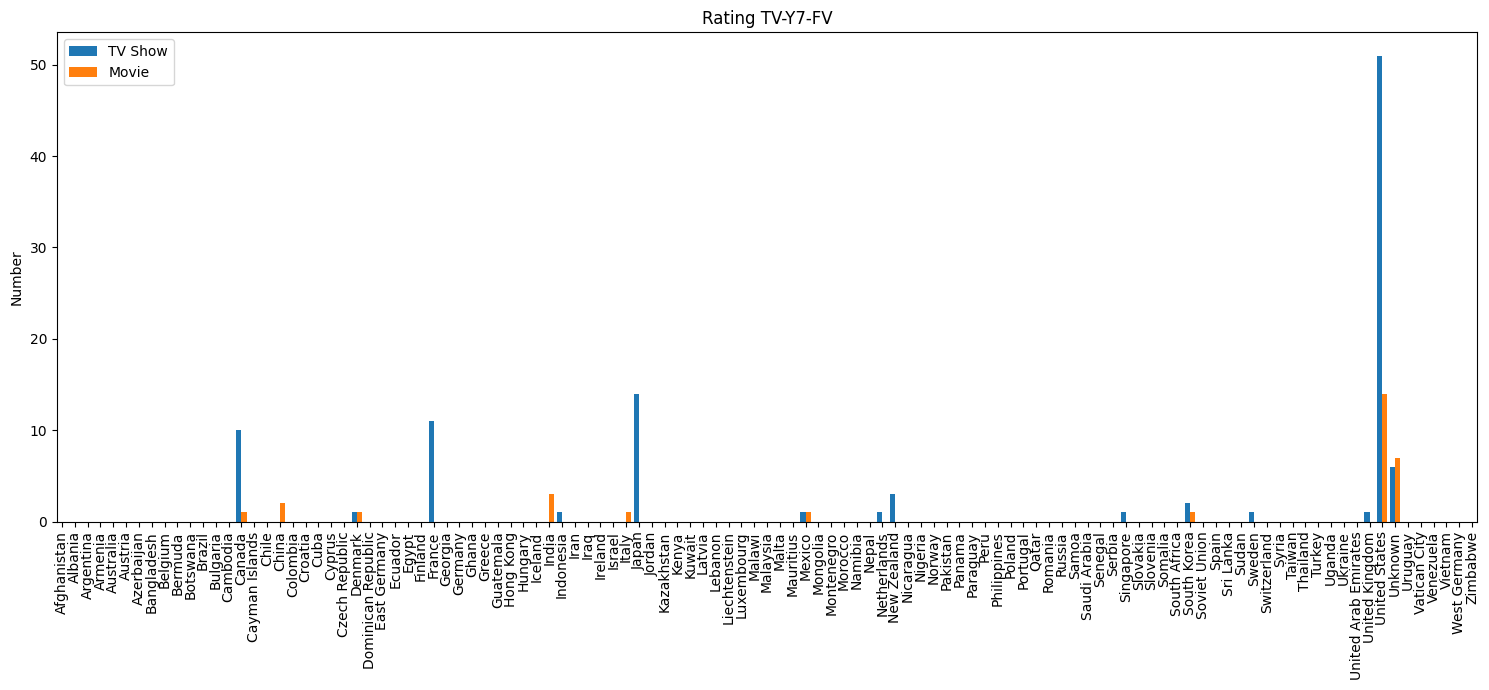

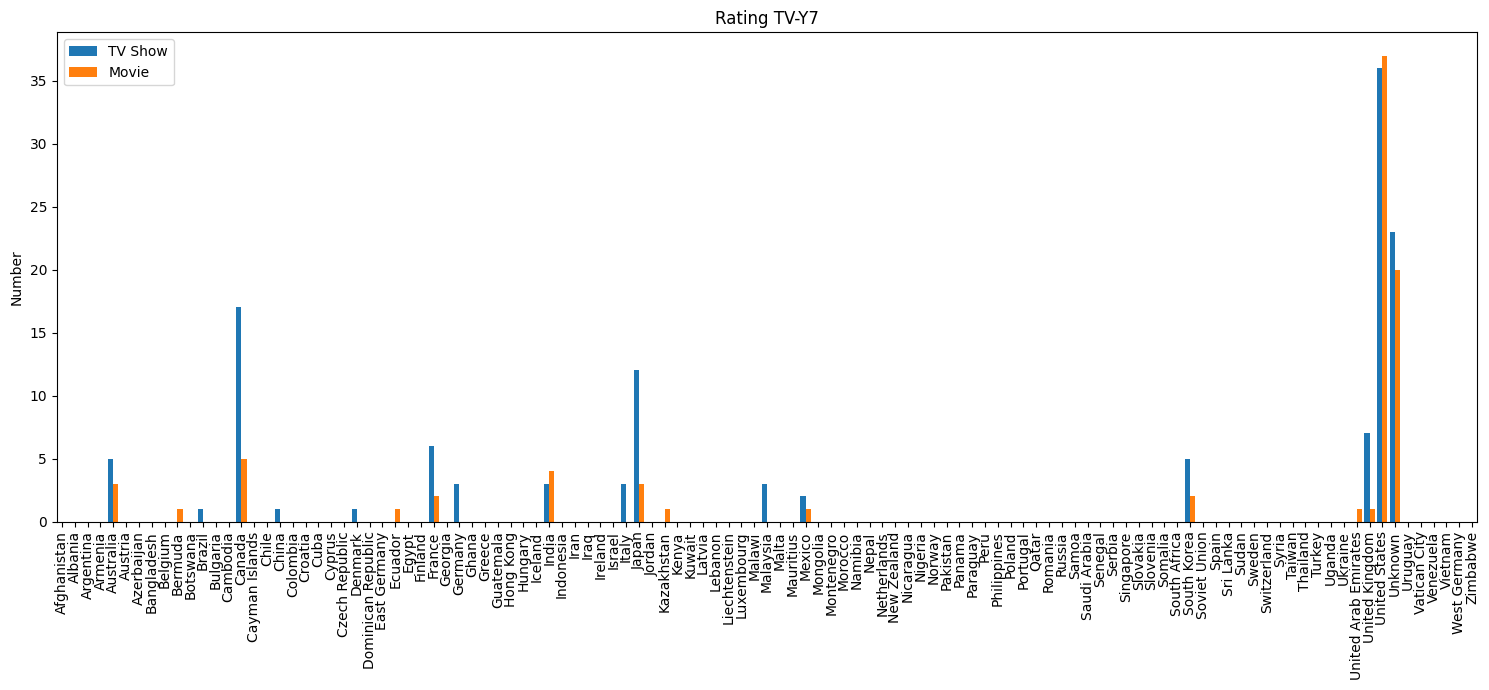

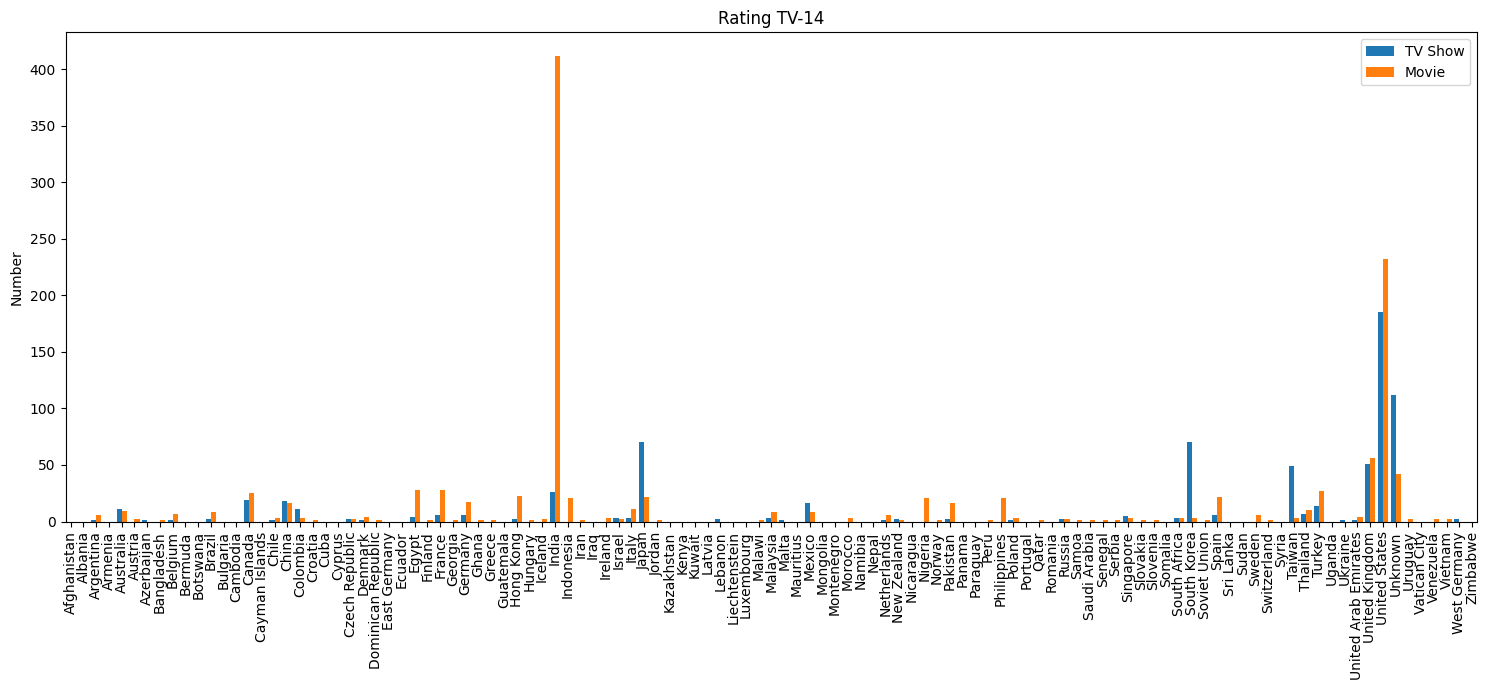

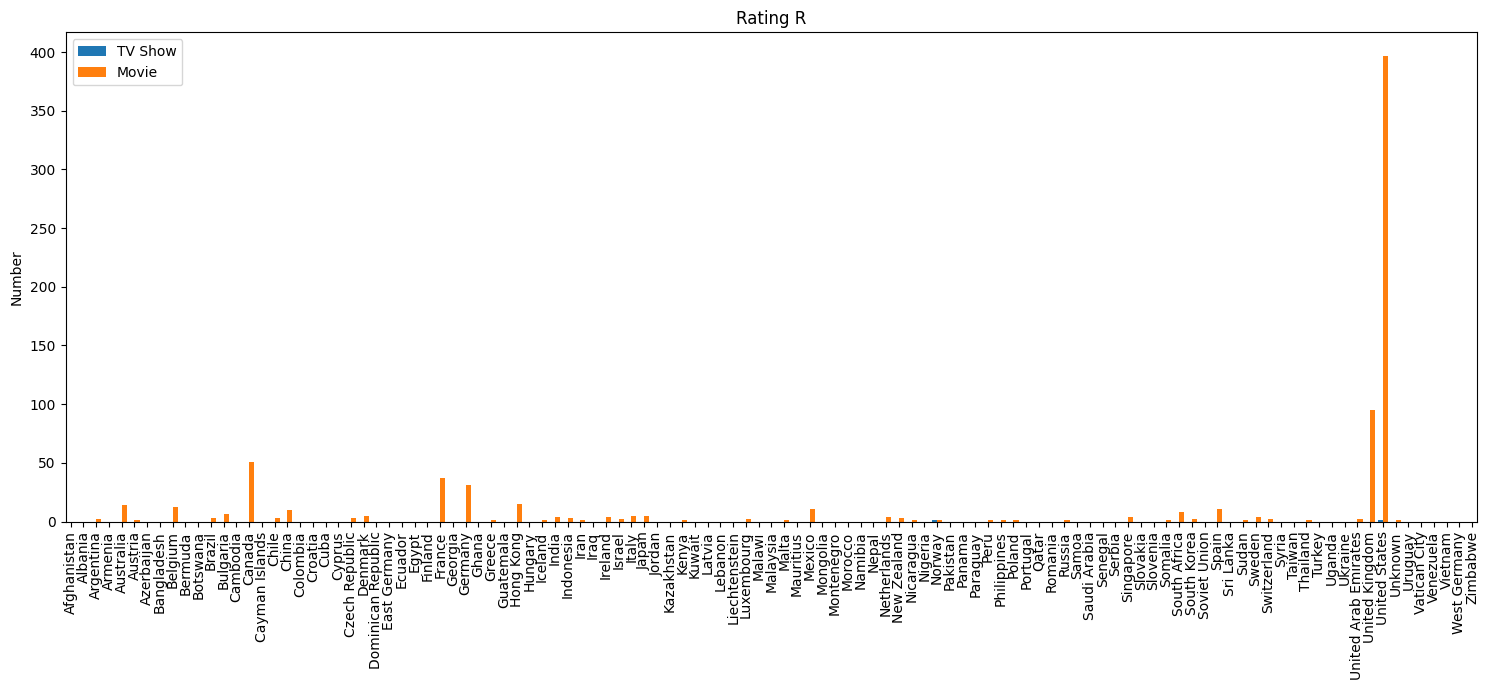

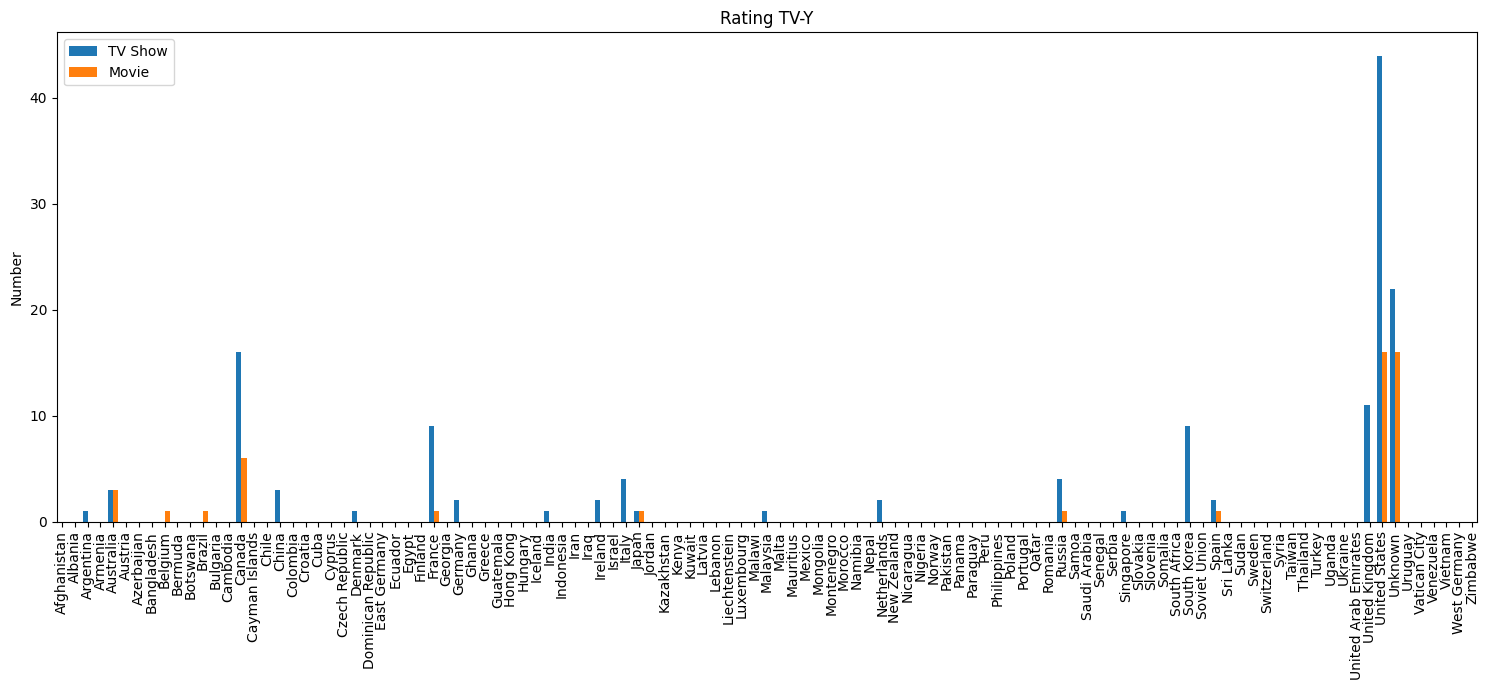

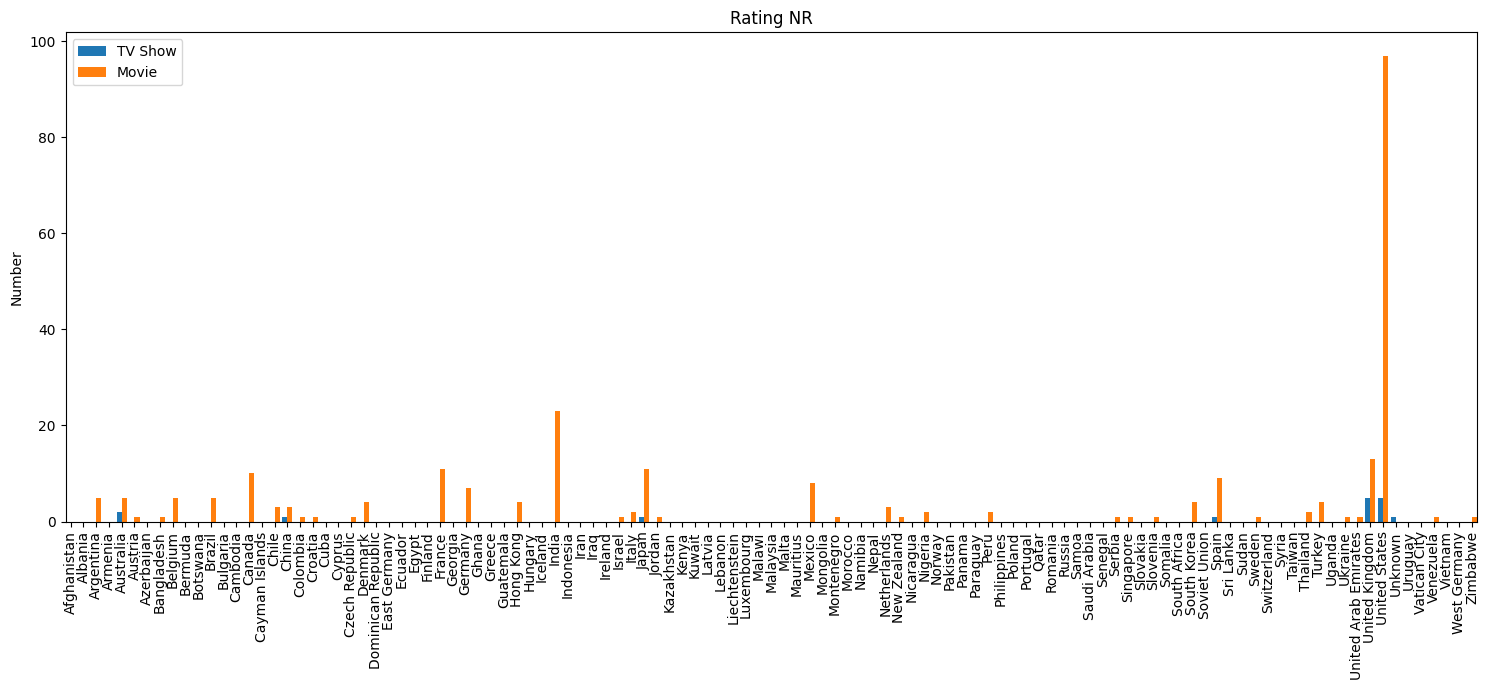

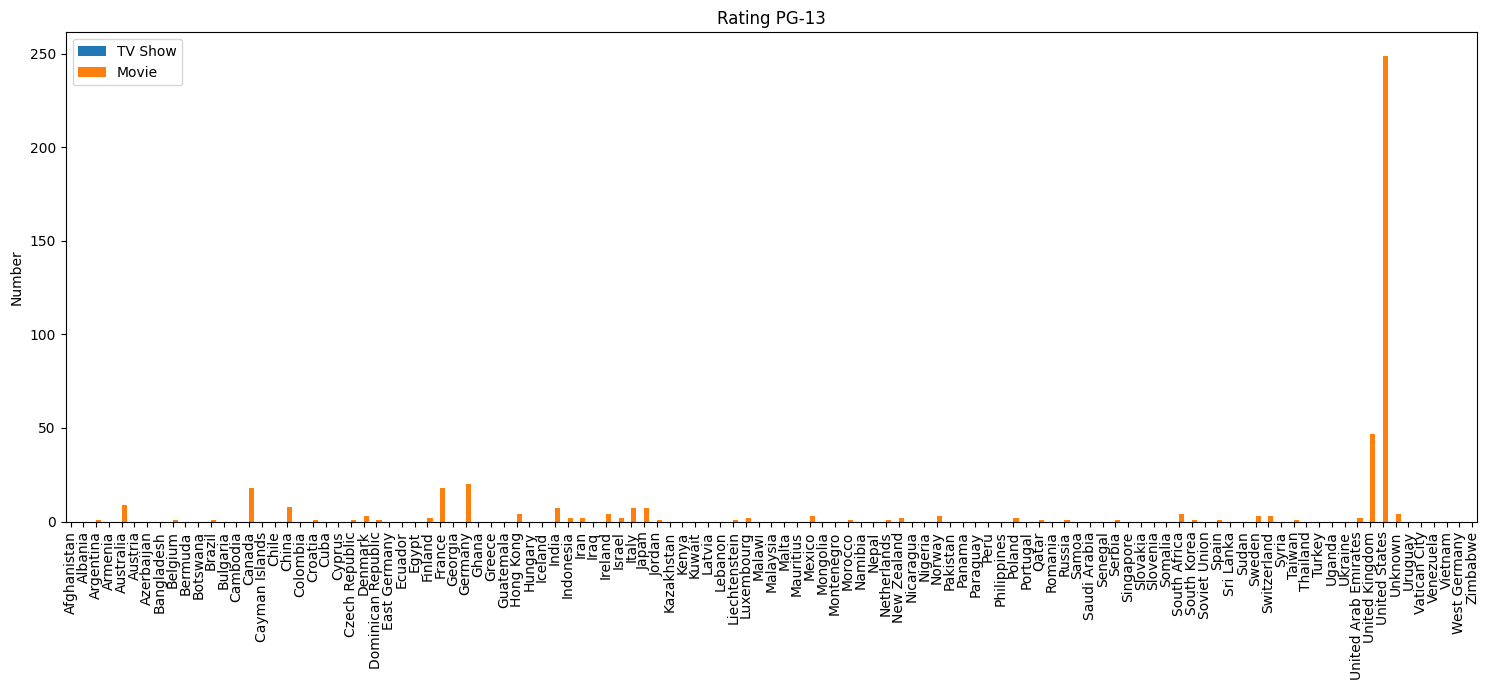

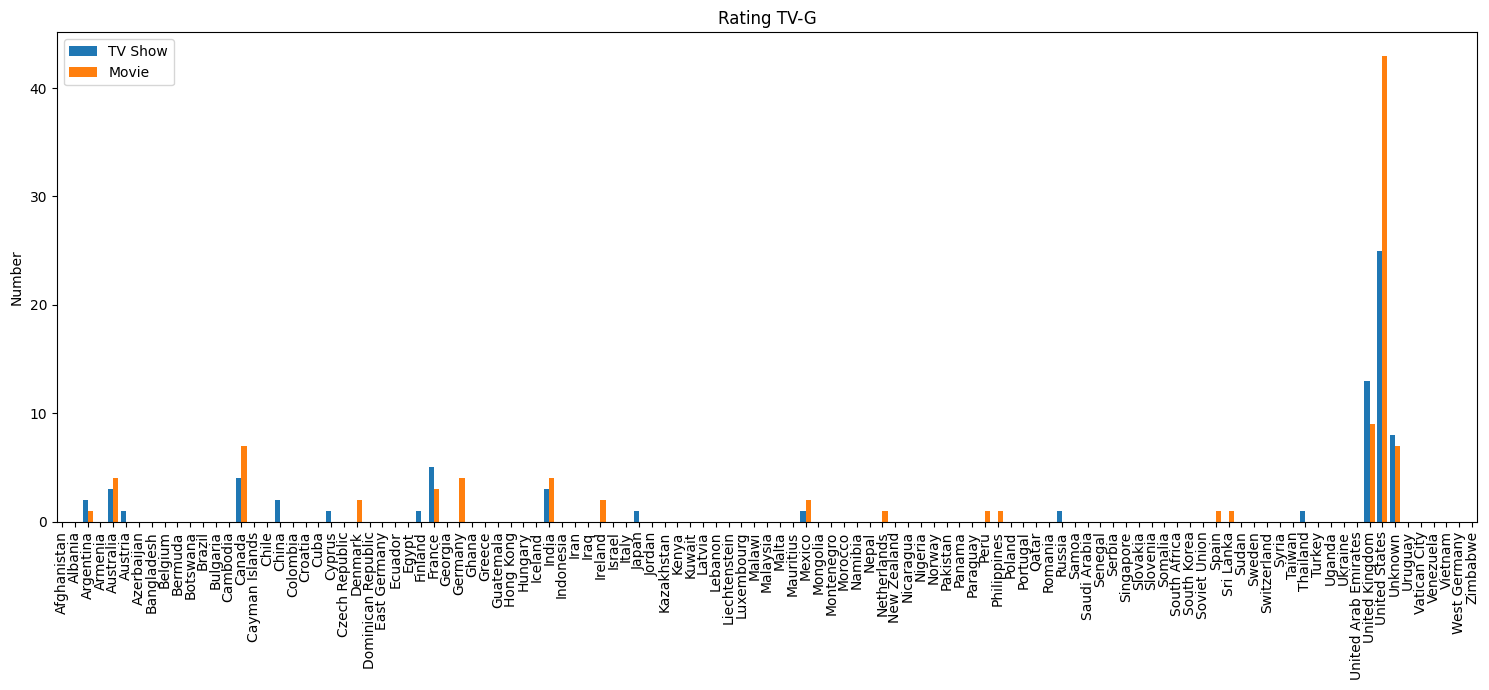

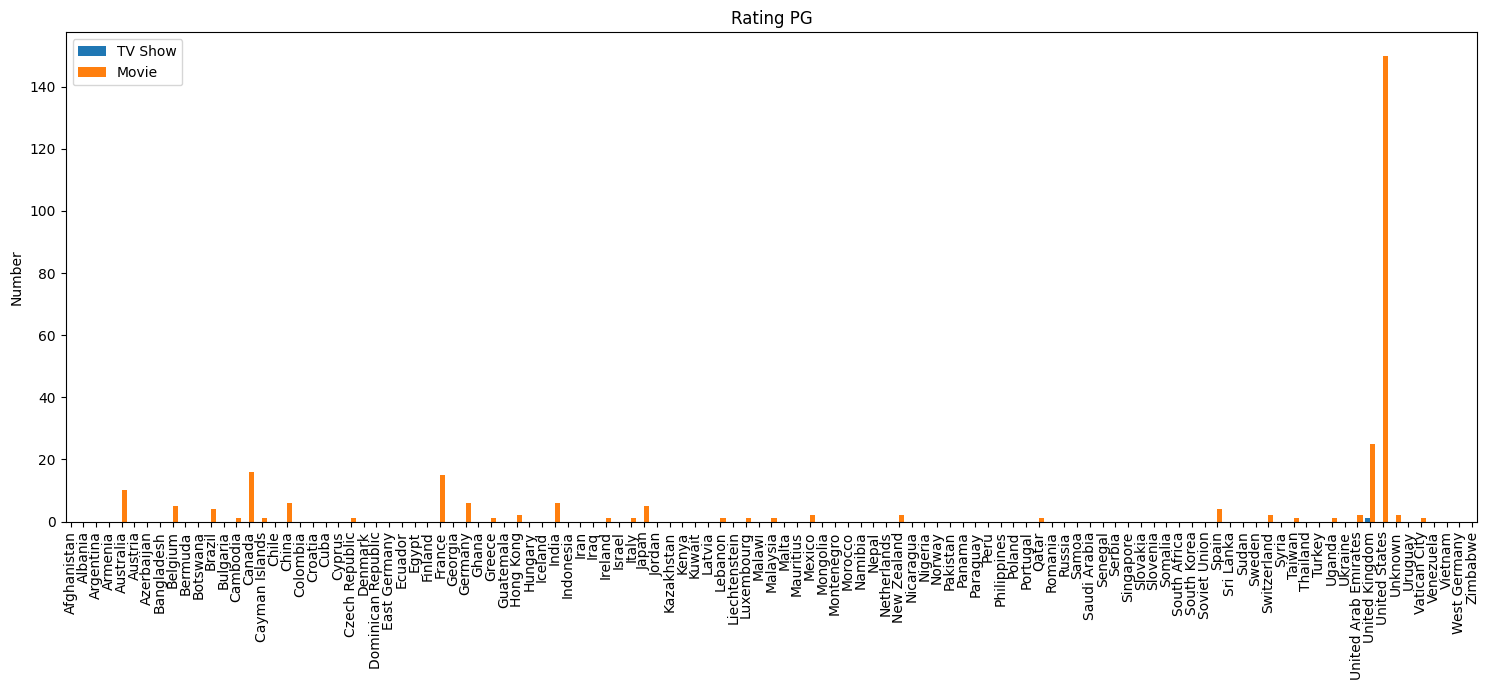

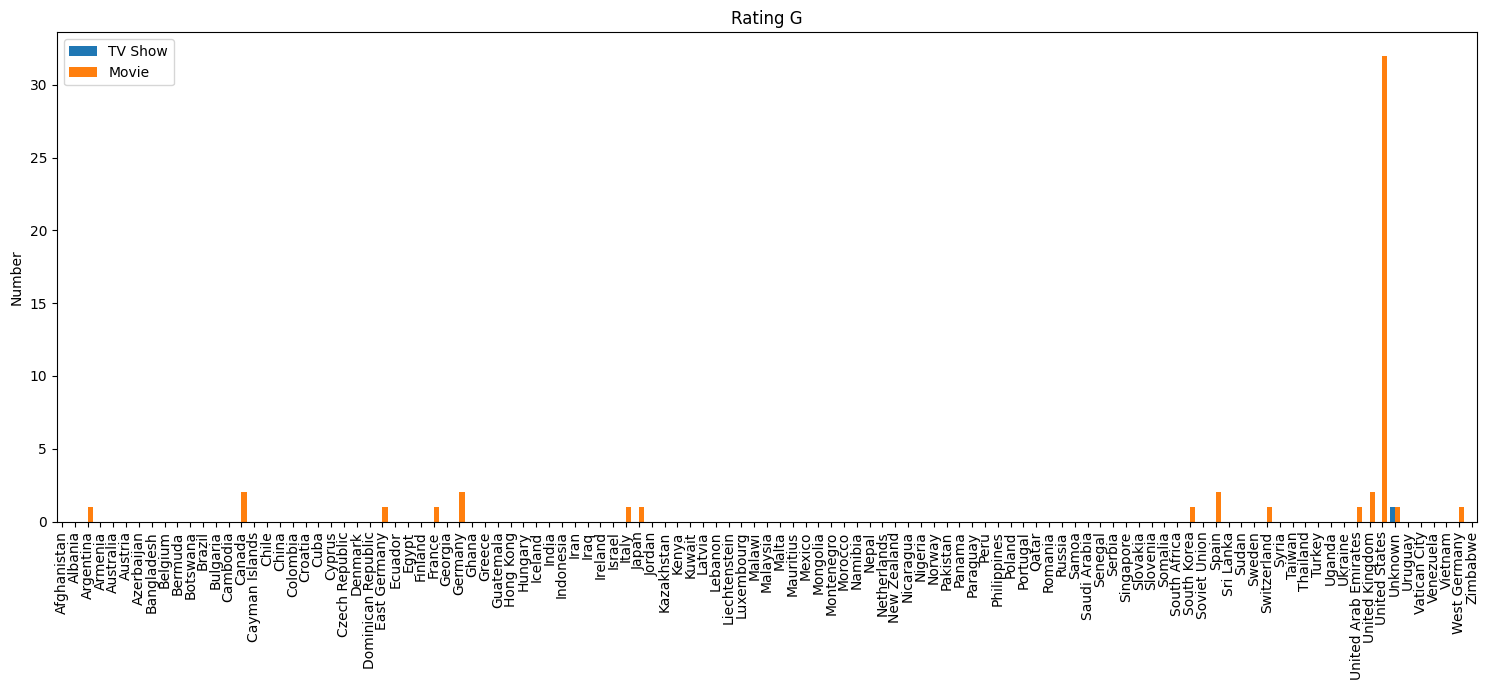

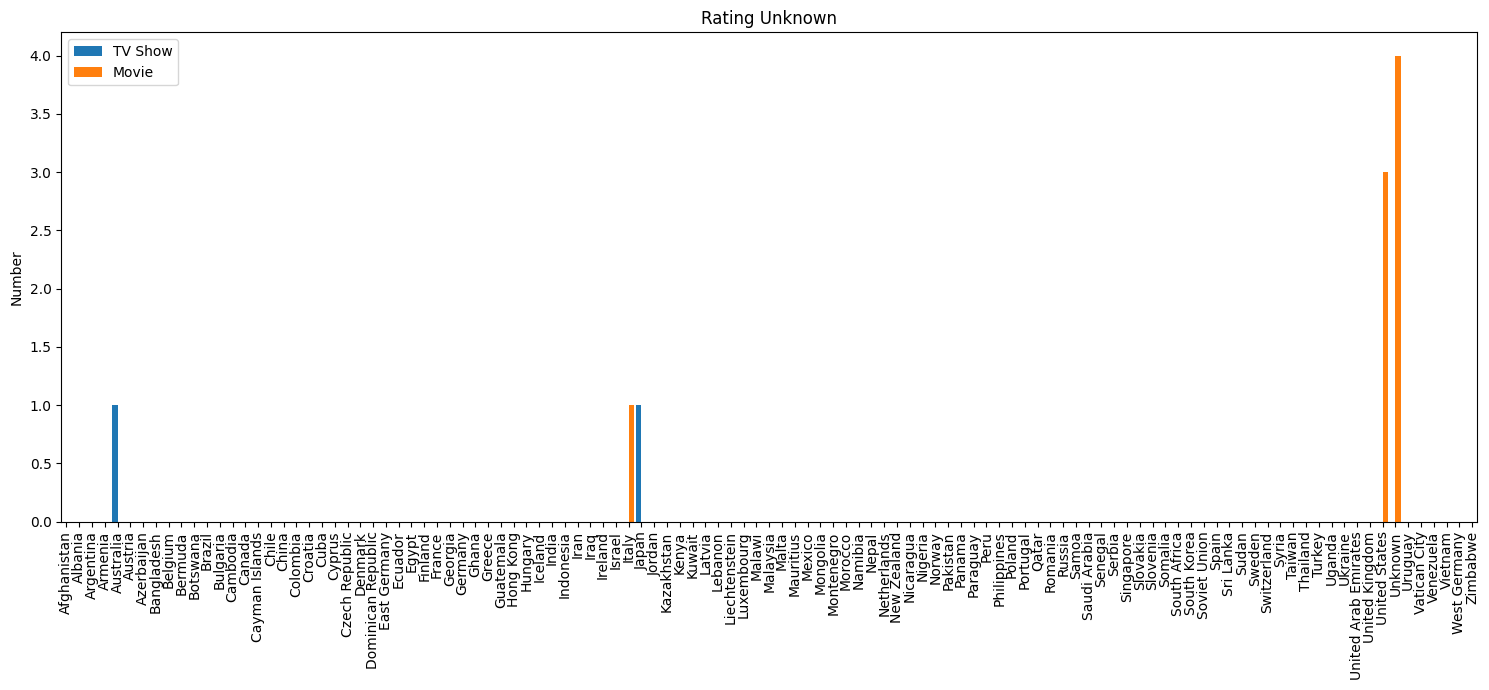

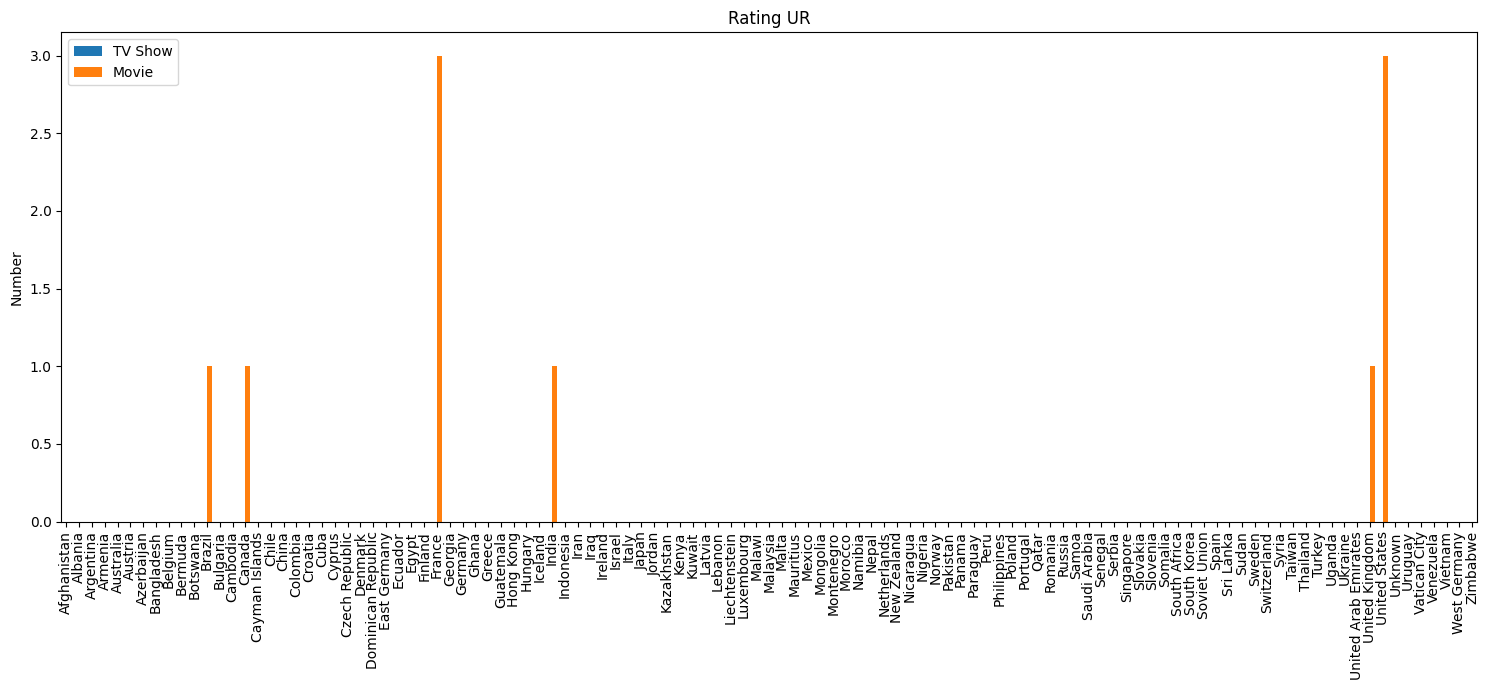

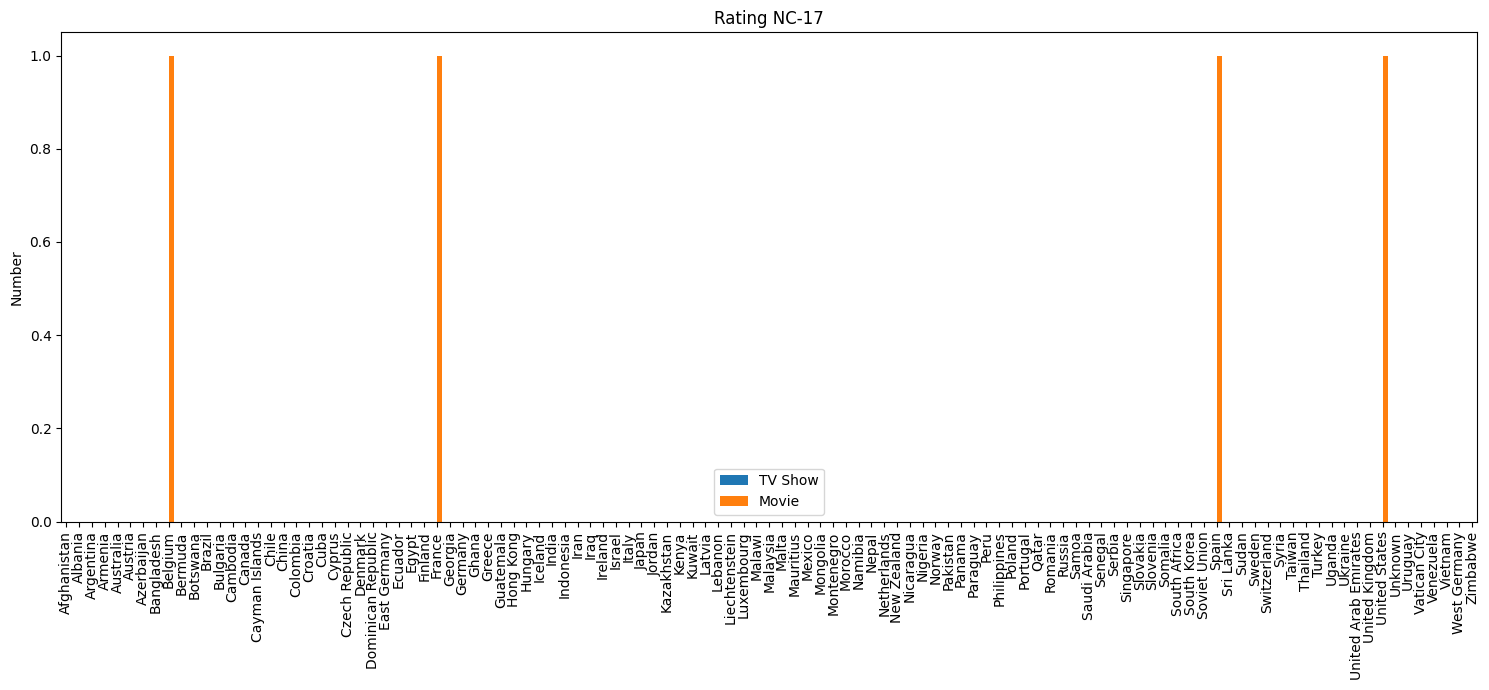

In [12]:
# Количество Фильмов и Сериалов по странам и рейтингу        
for rating in list(netflix["rating"].unique()):
    bar(tv_shows, movies, rating, "country", countries) 

5. На какую аудиторию ориентируются производители? 

	- TV-PG: +-140 фильмов из US и India. Около 100 сериалов из US, и +- 40 сериалов из UK и Unknown.
	- TV-MA: Около 500 фильмов и 200 сериалов из US. Примерно 190 фильмов из India. +- 90 фильмов и сериалов из UK. Примерно 70 фильмов из Spain и France. Производителей приблизительно 60 фильмов и сериалов неизвестно. 
	- TV-Y7-FV: Около 50 сериалов и 11 фильмов из US. Примерно 13 сериалов из Japan, и по 10 сериалов у France и Canada.
	- TV-Y7: Около 35 фильмов и сериалов US. 23 сериалов и 20 фильмов с Unknown. Примерно 17 сериалов и 5 фильмов из Canada. Около 12 сериалов из Japan. Примерно 6 сериалов из UK.
	- TV-14: Около 400 фильмов из India. Около 225 фильмов и 200 сериалов из US. Чуть больше 100 сериалов и 50 фильмов с Unknown производителями. Приблизительно по 60 сериалов из Japan и South Korea. Около 50 сериалов из Taiwan, и столько же сериалов и фильмов из UK.
	- R: Примерно 400 фильмов из US. Около 100 фильмов из UK. 50 фильмов из Canada. По 25-30 фильмов из France и Germany.
	- TV-Y:  Приблизительно 43 сериала и 15 фильма из US. 20 сериала и 15 фильма с Unknown производителями. Около 10 сериалов у UK, France и South Korea. Примерно 15 сериалов из Canada.
	- NR: Около 100 фильмов из US и около 20 фильмов из India.
	- PG-13: Примерно 250 фильмов у US, и около 50 фильмов у UK.
	- TV-G: Около 40 фильмов и 24 сериалов из US. 11 сериалов и 9 фильмов из UK.
	- PG: Чуть больше 140 фильмов из US, и 20 фильмов из UK.
	- G: Чуть больше 30 фильма из US.
	- UR: По 3 фильма у France и US. По 1 фильму из Brazil, Canada, India и UK.
	- NC-17: По 1 фильму у Belgium, France, Spain и US.

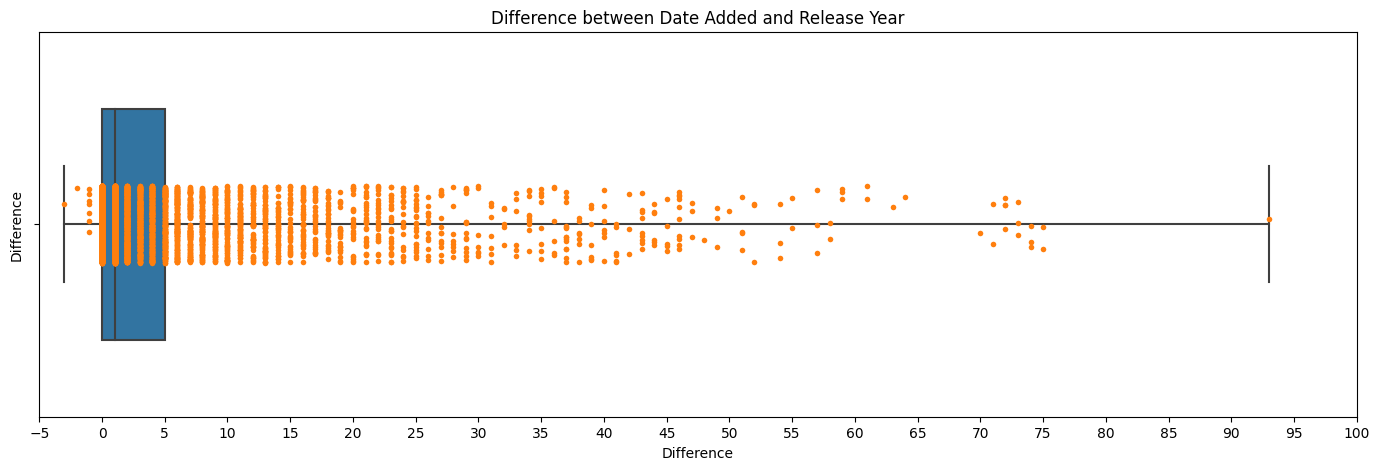

In [13]:
# Удаление 11 неизвестных данных в "date_added" и изменение типа на datetime
netflix_date=netflix[netflix["date_added"]!="Unknown"]
netflix_date.loc[:,"date_added"]=netflix_date["date_added"].apply(lambda x: x.strip())
netflix_date.loc[:,"date_added"]=pd.to_datetime(netflix_date["date_added"])

# Вычесление разницы во времени добавления и года производства
difference=[]
for i in range(len(netflix_date)):
    difference.append(int(netflix_date.loc[i,"date_added"].strftime('%Y'))-int(netflix_date.loc[i,"release_year"]))
difference=pd.DataFrame({"Difference":difference})

plt.figure(figsize=(17,5)) 
plt.margins(x=0.01)
sns.boxplot(x="Difference", data=difference, whis=[0, 100], width=.6)
sns.stripplot(x="Difference", data=difference, size=4, color="tab:orange", linewidth=0)
plt.xticks(np.arange(-5,105,5))
plt.ylabel("Difference")
plt.title("Difference between Date Added and Release Year")
plt.show()

6. Среднее время для добавления проекта в базу со дня его выпуска?

	- В среднем проект добавляется в базу Netflix через год, после его выхода. Большинство проектов было добавлено в промежутке 0-5 лет со дня релиза. Так же не мало проектов добавлялись в течении 25 лет со дня релиза. 

In [14]:
# Изменение типа "duration" на int, и создание столбца "duration_type".
def duration_split(data):
    data["duration"]=data["duration"].apply(lambda x: x.split(" "))
    data["duration_type"]=list(map(lambda value: value[1], data["duration"].values))
    data=data[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","duration_type","listed_in","description"]]
    data["duration"]=data["duration"].apply(lambda x: int(x[0]))
    return data

tv_shows=duration_split(tv_shows)
movies=duration_split(movies)

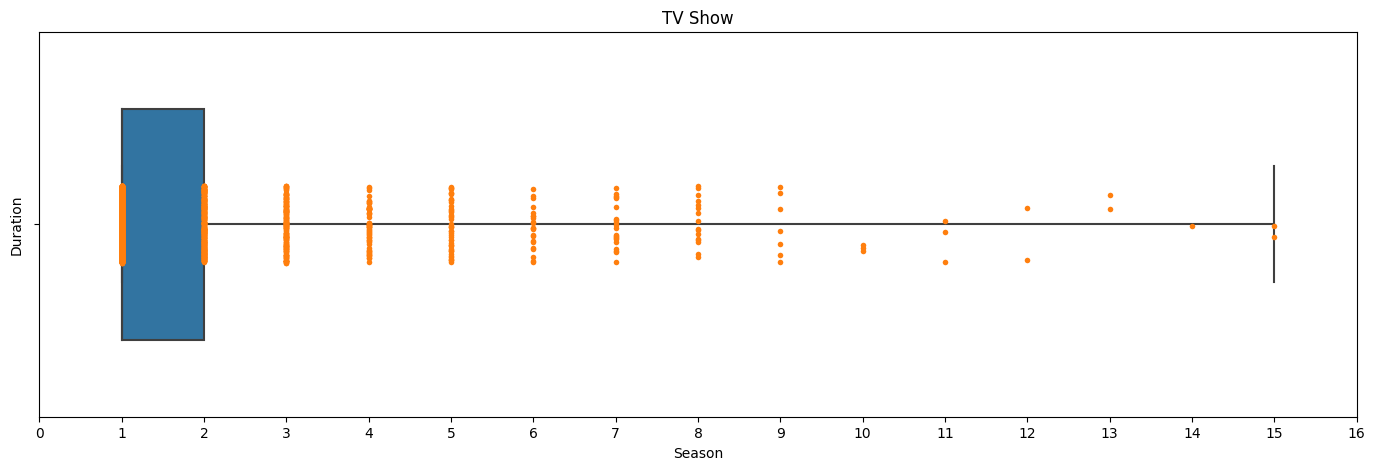

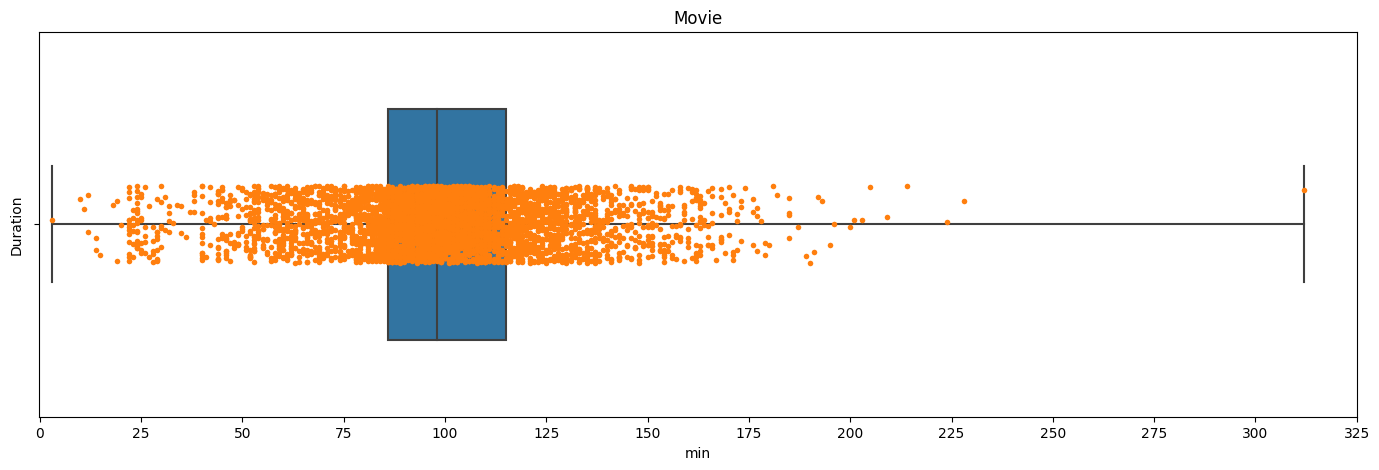

In [15]:
# Расчет среднего значения длительностей проектов
def boxplot(data,column,x_tick):
    plt.figure(figsize=(17,5)) 
    plt.margins(x=0.01)
    sns.boxplot(x=column, data=data, whis=[0, 100], width=.6)
    sns.stripplot(x=column, data=data, size=4, color="tab:orange", linewidth=0)
    plt.xticks(x_tick)
    plt.ylabel("Duration")
    plt.xlabel(data.loc[1,"duration_type"])
    plt.title(data.loc[1,"type"])
    plt.show()
    
for data, tick in zip([tv_shows, movies],[np.arange(0,17,1),np.arange(0,350,25)]):
    boxplot(data, "duration", tick)

7. Какова средняя длительность фильмов и сериалов?

	- Сериалы в основном длятся 1-2 сезона. Не мало сериалов длились 5 сезонов. Максимальная длинный сериал состоит из 15 сезонов.
	- Средняя длительность фильма составляет около 98 минут. Большинство фильмов в районе 85-115 минут. Самый длинный фильм длиться около 315 минут.